<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

C:\Users\Intel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [4]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [5]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 215.80539153995667 seconds


In [6]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [7]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [8]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [9]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


# 4. Feature Generation Techniques

**4.1 Word2Vec**

In [10]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Function to Remove HTML Tags
def cleanhtml(sentence):
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner,"",sentence)
    return cleantext
# Function to clean punctuations and special characters

def cleanpunct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in result['TEXT'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunct(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)    
words = list(w2v_model.wv.vocab)
print(len(words))

37292


In [11]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

**4.2 Splitting the Data into Train and Test**

In [12]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

# 5. Machine Learning Models

**5.1 Plotting Confusion Matrix and Log Loss**

In [13]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)
    
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(y_test, predict_y):
     # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
     #divid each element of the confusion matrix with the sum of elements in that row
        
    C = confusion_matrix(y_test, predict_y)   
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
        
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [14]:
train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)

# **5.2.1 Decision Tree on Word2VEC**

for max_depth = 1
Log Loss : 1.6768064504935098
for max_depth = 3
Log Loss : 1.4693650982062914
for max_depth = 5
Log Loss : 1.414904305002864
for max_depth = 7
Log Loss : 1.424140165638376
for max_depth = 9
Log Loss : 1.3982036029694354
for max_depth = 11
Log Loss : 1.4102771175004336
for max_depth = 13
Log Loss : 1.4012168212732061
for max_depth = 15
Log Loss : 1.4050314884723918
for max_depth = 17
Log Loss : 1.397246837724398
for max_depth = 19
Log Loss : 1.3948320874373867


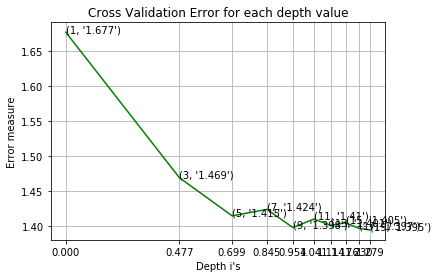

For values of best depth =  19 The train log loss is: 0.8921901832792103
For values of best depth =  19 The cross validation log loss is: 1.4098502586932777
For values of best depth =  19 The test log loss is: 1.3579550657036152
Log loss : 1.409357661007398
Number of mis-classified points : 0.4774436090225564
-------------------- Confusion matrix --------------------


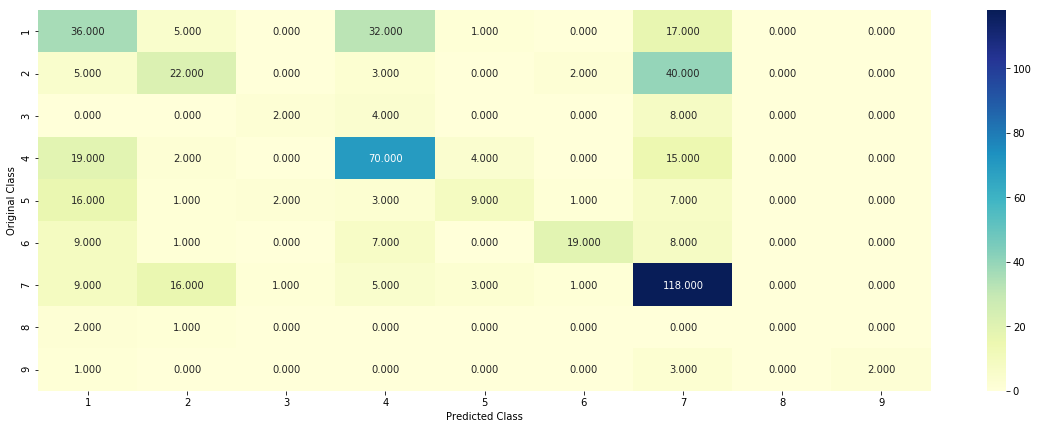

-------------------- Precision matrix (Columm Sum=1) --------------------


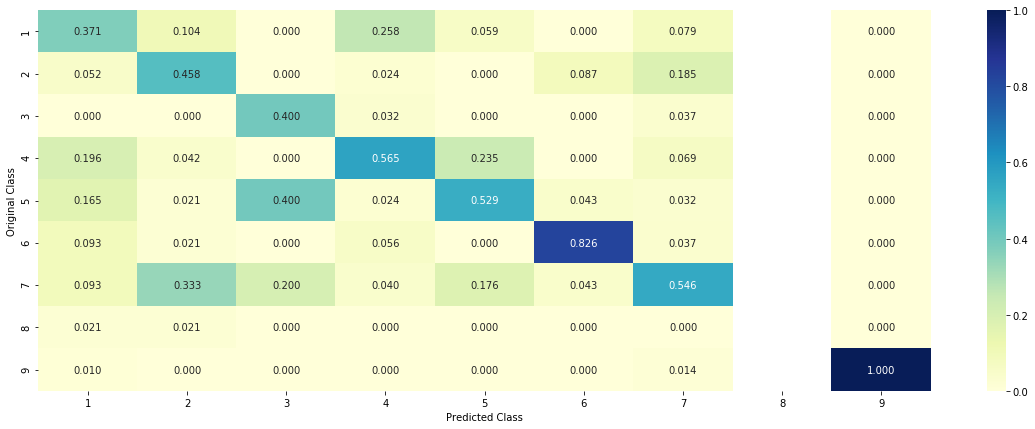

-------------------- Recall matrix (Row sum=1) --------------------


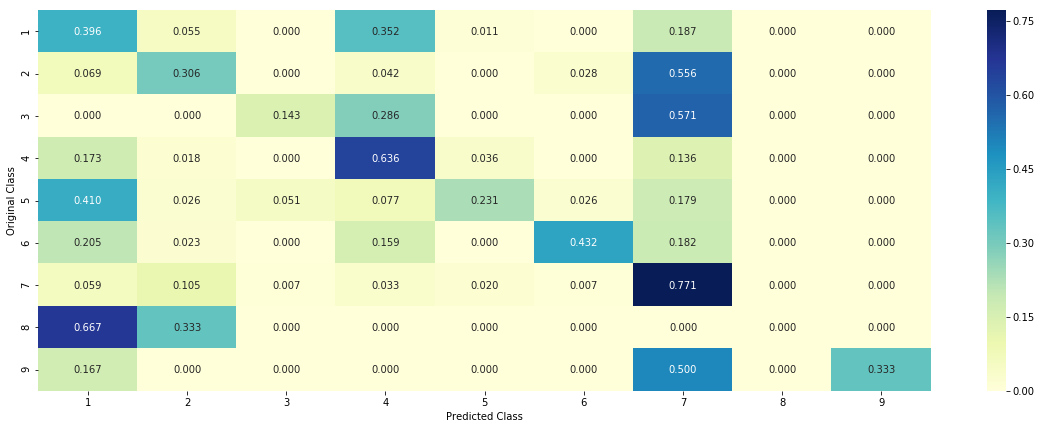

In [15]:
from sklearn import tree

depth = [1,3,5,7,9,11,13,15,17,19]
cv_log_error_array = []
for i in depth:
    print("for max_depth =", i)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(depth), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((depth[i],str(txt)), (np.log10(depth[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(depth))
plt.title("Cross Validation Error for each depth value")
plt.xlabel("Depth i's")
plt.ylabel("Error measure")
plt.show()

best_depth = np.argmin(cv_log_error_array)
clf = tree.DecisionTreeClassifier(max_depth=depth[best_depth])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best depth = ', depth[best_depth], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best depth = ', depth[best_depth], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best depth = ', depth[best_depth], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



clf = tree.DecisionTreeClassifier(max_depth=depth[best_depth])
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

**4.3 TF-IDF Average Weighted Word2Vec**

In [16]:
tf_idf_vec = TfidfVectorizer()
final_tf_idf = tf_idf_vec.fit_transform(result['TEXT'].values)
features = tf_idf_vec.get_feature_names()

tfidf_feat = tf_idf_vec.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = vect_tfidf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    
    try:
        sent_vec /= weight_sum
    except:
        pass
    
    tfidf_sent_vectors.append(sent_vec)
    row += 1

**4.4 Splitting the Data into Train and Test for TF-IDF Word2Vec**

In [17]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [18]:
train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

**5.2.2 Decision Tree on TF-IDF Average Weighted Word2Vec**

for max_depth = 1
Log Loss : 1.8302599806224276
for max_depth = 3
Log Loss : 1.8302599806224276
for max_depth = 5
Log Loss : 1.8302599806224276
for max_depth = 7
Log Loss : 1.8302599806224276
for max_depth = 9
Log Loss : 1.8302599806224276
for max_depth = 11
Log Loss : 1.8302599806224276
for max_depth = 13
Log Loss : 1.8302599806224276
for max_depth = 15
Log Loss : 1.8302599806224276
for max_depth = 17
Log Loss : 1.8302599806224276
for max_depth = 19
Log Loss : 1.8302599806224276
for max_depth = 21
Log Loss : 1.8302599806224276
for max_depth = 23
Log Loss : 1.8302599806224276
for max_depth = 25
Log Loss : 1.8302599806224276
for max_depth = 27
Log Loss : 1.8302599806224276
for max_depth = 29
Log Loss : 1.8302599806224276


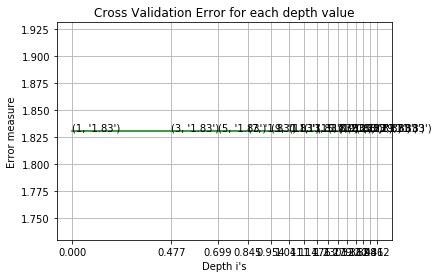

For values of best depth =  1 The train log loss is: 1.8317745288819178
For values of best depth =  1 The cross validation log loss is: 1.8302599806224276
For values of best depth =  1 The test log loss is: 1.830597196233008
Log loss : 1.8302599806224276
Number of mis-classified points : 0.7124060150375939
-------------------- Confusion matrix --------------------


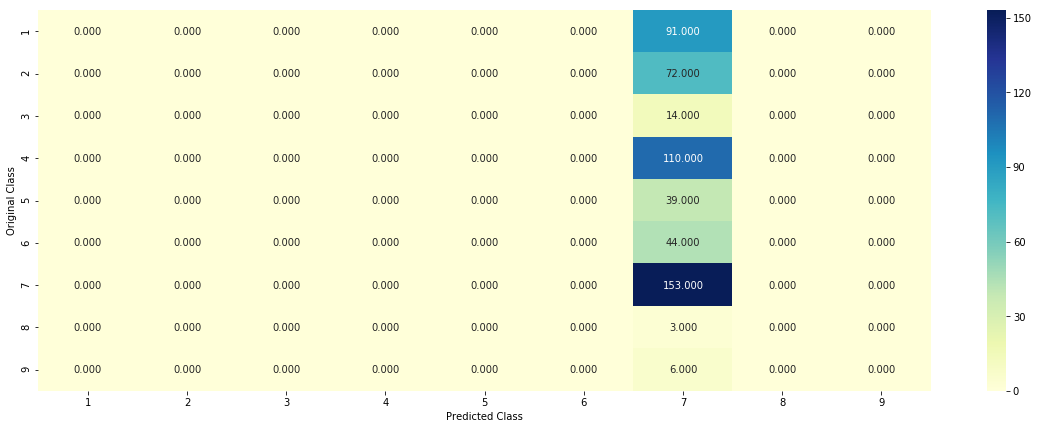

-------------------- Precision matrix (Columm Sum=1) --------------------


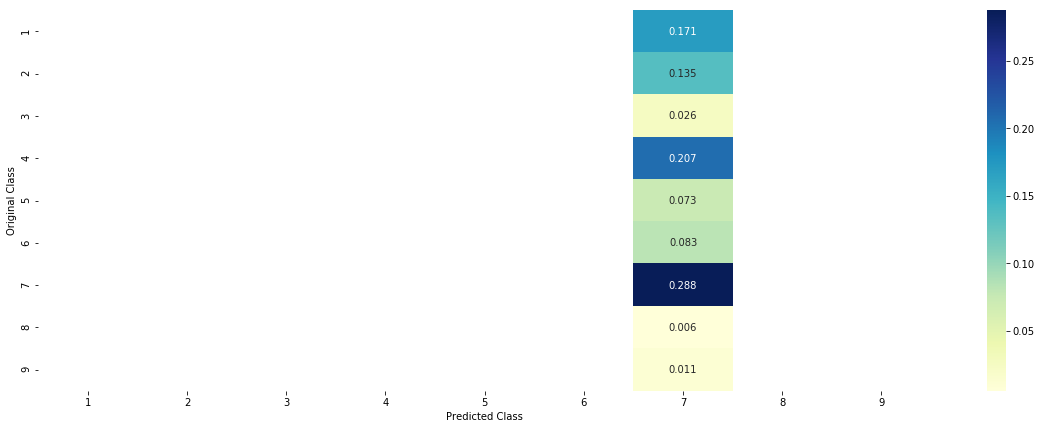

-------------------- Recall matrix (Row sum=1) --------------------


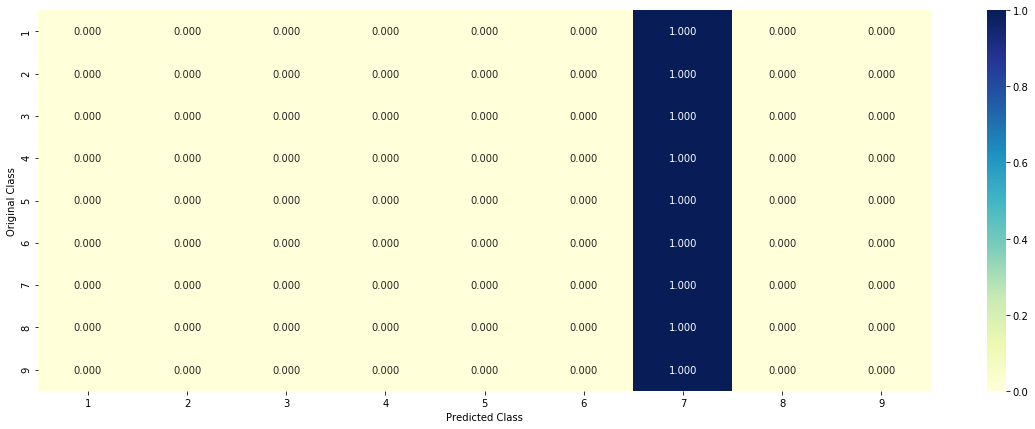

In [19]:
from sklearn import tree

depth = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
cv_log_error_array = []
for i in depth:
    print("for max_depth =", i)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(depth), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((depth[i],str(txt)), (np.log10(depth[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(depth))
plt.title("Cross Validation Error for each depth value")
plt.xlabel("Depth i's")
plt.ylabel("Error measure")
plt.show()

best_depth = np.argmin(cv_log_error_array)
clf = tree.DecisionTreeClassifier(max_depth=depth[best_depth])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best depth = ', depth[best_depth], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best depth = ', depth[best_depth], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best depth = ', depth[best_depth], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


clf = tree.DecisionTreeClassifier(max_depth=depth[best_depth])
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

# 5.3 K-NN

**5.3.1 K-NN on Word2Vec**

In [20]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
#test_df = np.nan_to_num(test_df)

for alpha = 5
Log Loss : 1.2376004184509777
for alpha = 11
Log Loss : 1.2568490826620706
for alpha = 15
Log Loss : 1.2703961069452203
for alpha = 21
Log Loss : 1.2999815055765591
for alpha = 31
Log Loss : 1.3329780417317387
for alpha = 41
Log Loss : 1.3537822581242858
for alpha = 51
Log Loss : 1.363925904315822
for alpha = 99
Log Loss : 1.4287849810665412


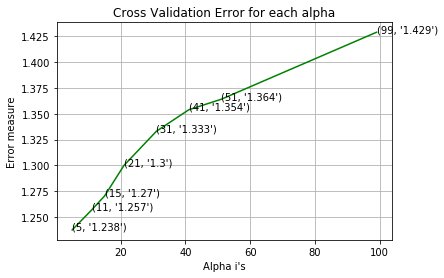

For values of best alpha =  5 The train log loss is: 1.0019945509944055
For values of best alpha =  5 The cross validation log loss is: 1.2376004184509777
For values of best alpha =  5 The test log loss is: 1.296889968826423
Log loss : 1.2376004184509777
Number of mis-classified points : 0.44548872180451127
-------------------- Confusion matrix --------------------


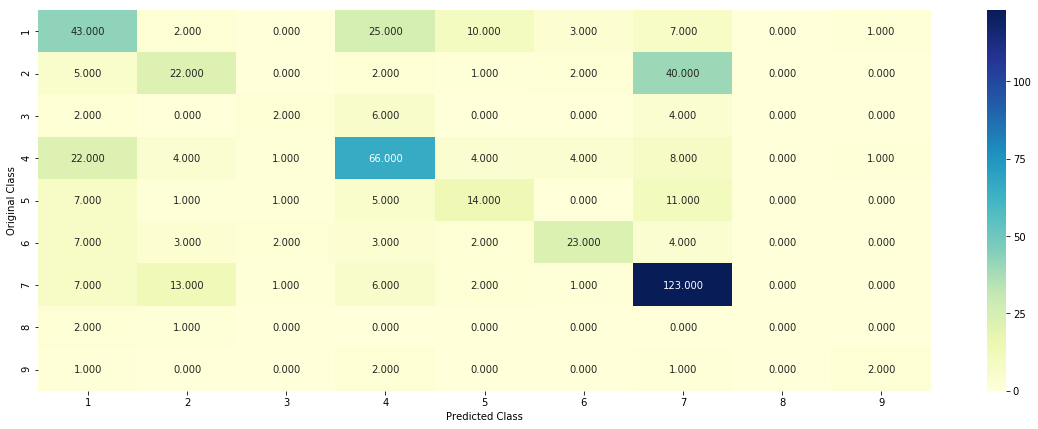

-------------------- Precision matrix (Columm Sum=1) --------------------


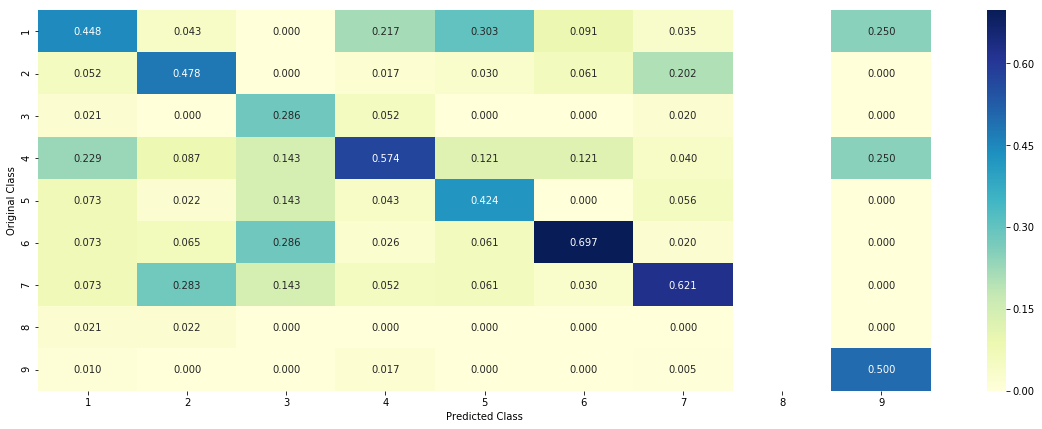

-------------------- Recall matrix (Row sum=1) --------------------


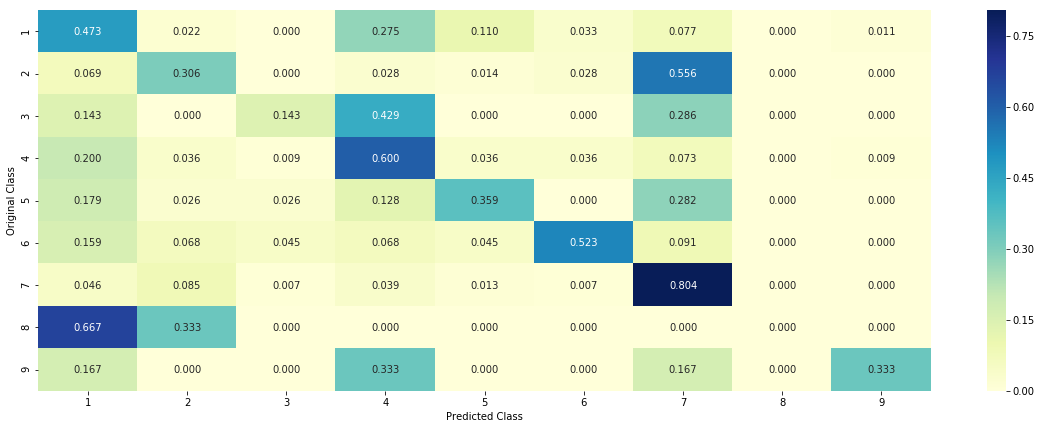

In [21]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

**5.3.2 K-NN on TF-IDF Word2Vec**

In [22]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

for alpha = 5
Log Loss : 1.8302599806225108
for alpha = 11
Log Loss : 1.830259980625098
for alpha = 15
Log Loss : 1.8302599806258544
for alpha = 21
Log Loss : 1.8302599806244961
for alpha = 31
Log Loss : 1.8302599806230517
for alpha = 41
Log Loss : 1.8302599806230753
for alpha = 51
Log Loss : 1.8302599806229338
for alpha = 99
Log Loss : 1.830259980622721


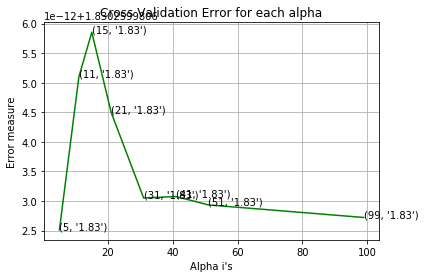

For values of best alpha =  5 The train log loss is: 1.831774528881899
For values of best alpha =  5 The cross validation log loss is: 1.8302599806225108
For values of best alpha =  5 The test log loss is: 1.8305971962331238
Log loss : 1.8302599806225108
Number of mis-classified points : 0.7124060150375939
-------------------- Confusion matrix --------------------


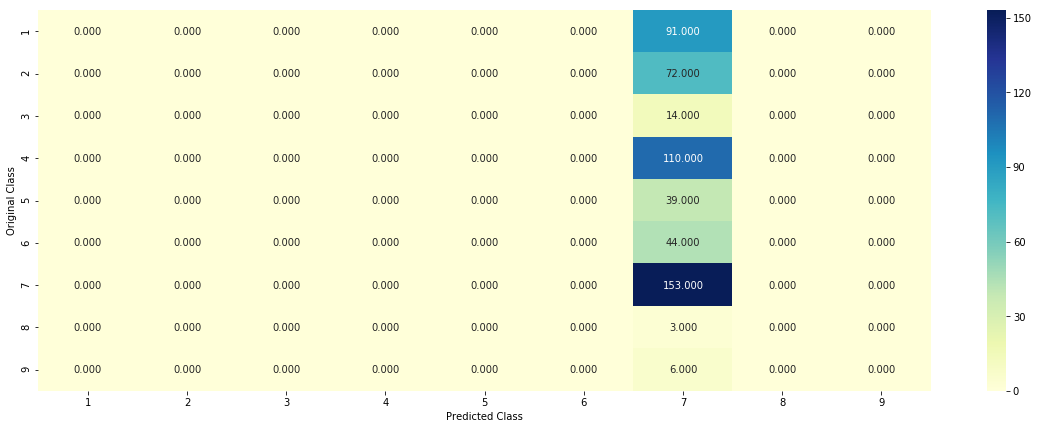

-------------------- Precision matrix (Columm Sum=1) --------------------


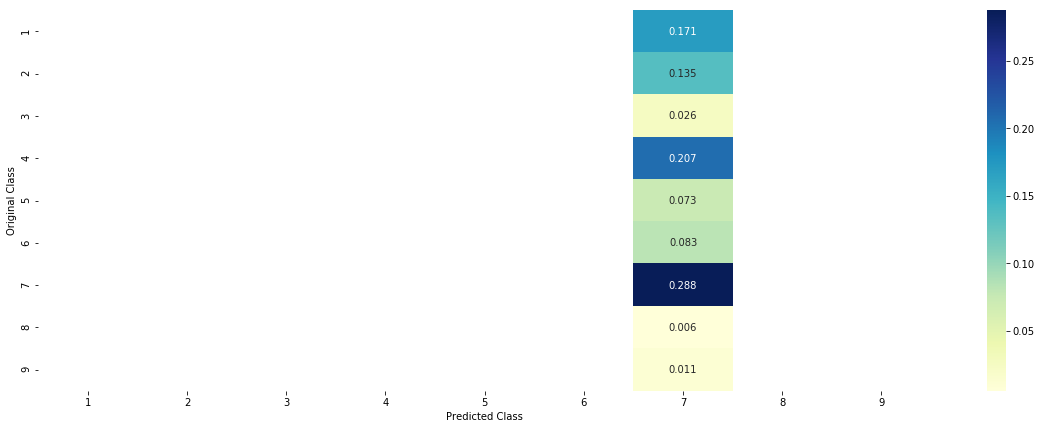

-------------------- Recall matrix (Row sum=1) --------------------


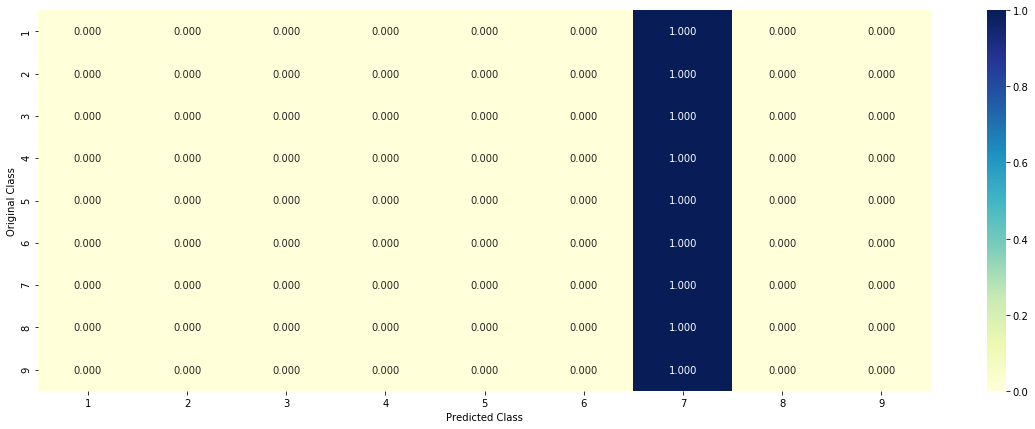

In [23]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

# 5.4 Logistic Regression with Class Balancing

**5.4.1 LR on Word2VEC**

In [24]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
#test_df = np.nan_to_num(test_df)

for alpha = 1e-06
Log Loss : 1.3776952184289895
for alpha = 1e-05
Log Loss : 1.395117757310599
for alpha = 0.0001
Log Loss : 1.3847314223030904
for alpha = 0.001
Log Loss : 1.3389557667407637
for alpha = 0.01
Log Loss : 1.3425412187285335
for alpha = 0.1
Log Loss : 1.4408485277732523
for alpha = 1
Log Loss : 1.607607955049025
for alpha = 10
Log Loss : 1.7822535960860508
for alpha = 100
Log Loss : 1.8058229354758446


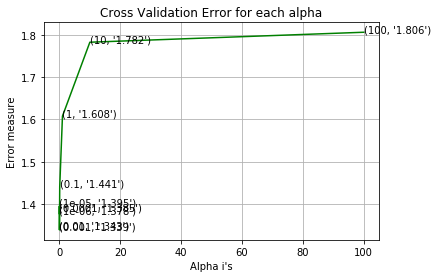

For values of best alpha =  0.001 The train log loss is: 1.254270382943675
For values of best alpha =  0.001 The cross validation log loss is: 1.3389557667407637
For values of best alpha =  0.001 The test log loss is: 1.3316742328654345
Log loss : 1.3389557667407637
Number of mis-classified points : 0.4699248120300752
-------------------- Confusion matrix --------------------


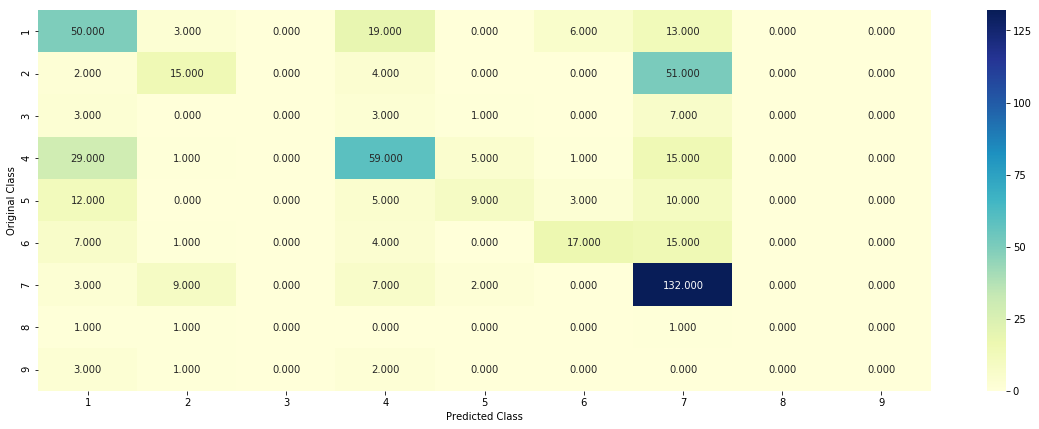

-------------------- Precision matrix (Columm Sum=1) --------------------


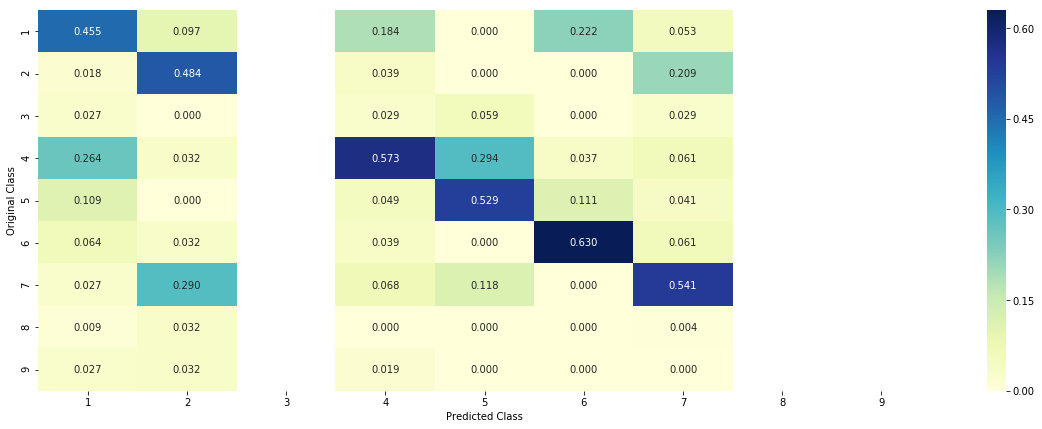

-------------------- Recall matrix (Row sum=1) --------------------


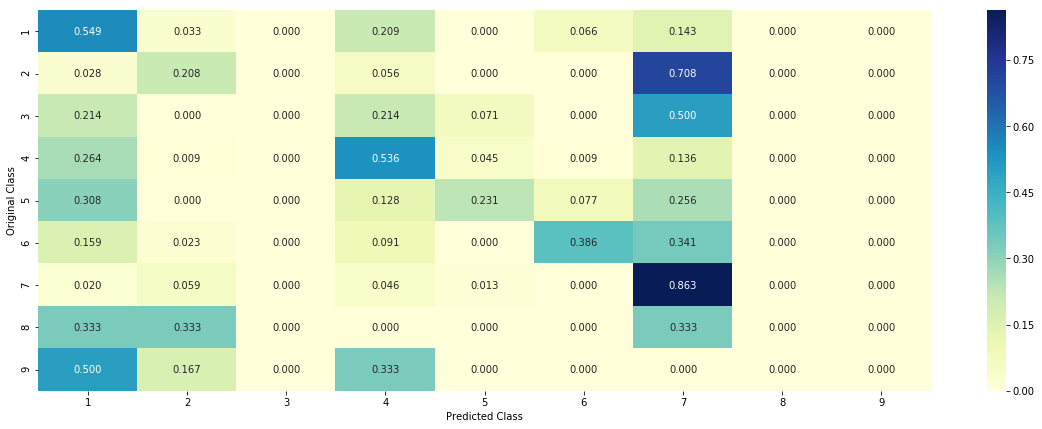

In [25]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

**5.4.2 LR on TF-IDF Word2VEC**

In [26]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

for alpha = 1e-06
Log Loss : 1.8302599805049522
for alpha = 1e-05
Log Loss : 1.8302599805112367
for alpha = 0.0001
Log Loss : 1.8302599804446804
for alpha = 0.001
Log Loss : 1.8302599804444584
for alpha = 0.01
Log Loss : 1.830259980482615
for alpha = 0.1
Log Loss : 1.8302599804889936
for alpha = 1
Log Loss : 1.8302599805074071
for alpha = 10
Log Loss : 1.830259980938414
for alpha = 100
Log Loss : 1.8302599806437427


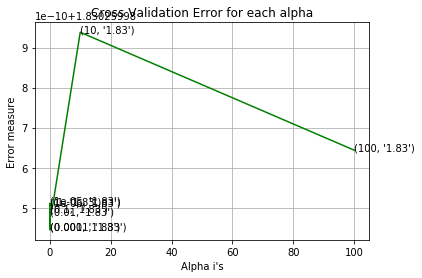

For values of best alpha =  0.001 The train log loss is: 1.8317745287215113
For values of best alpha =  0.001 The cross validation log loss is: 1.8302599804444584
For values of best alpha =  0.001 The test log loss is: 1.8305971961198069
Log loss : 1.8302599804444584
Number of mis-classified points : 0.7124060150375939
-------------------- Confusion matrix --------------------


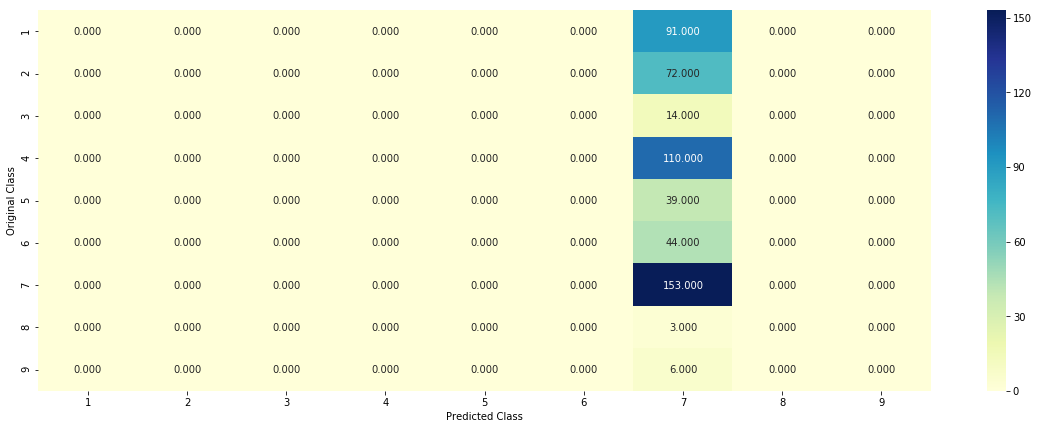

-------------------- Precision matrix (Columm Sum=1) --------------------


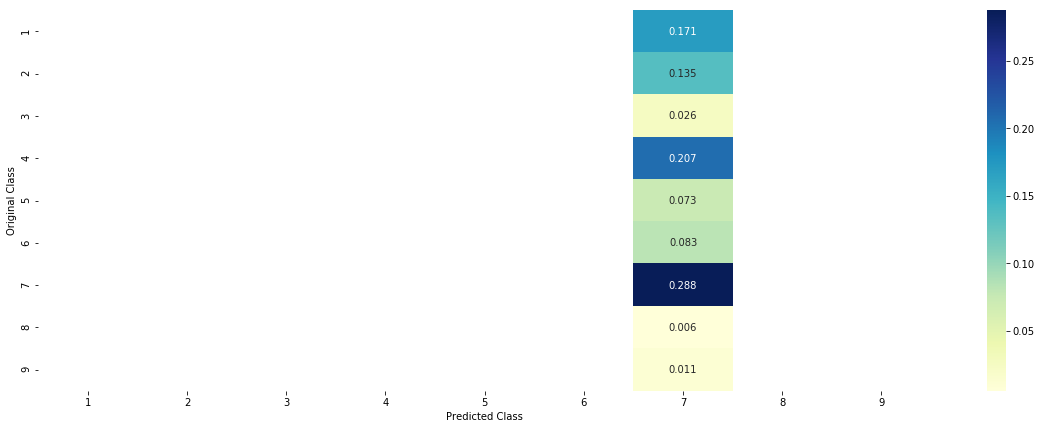

-------------------- Recall matrix (Row sum=1) --------------------


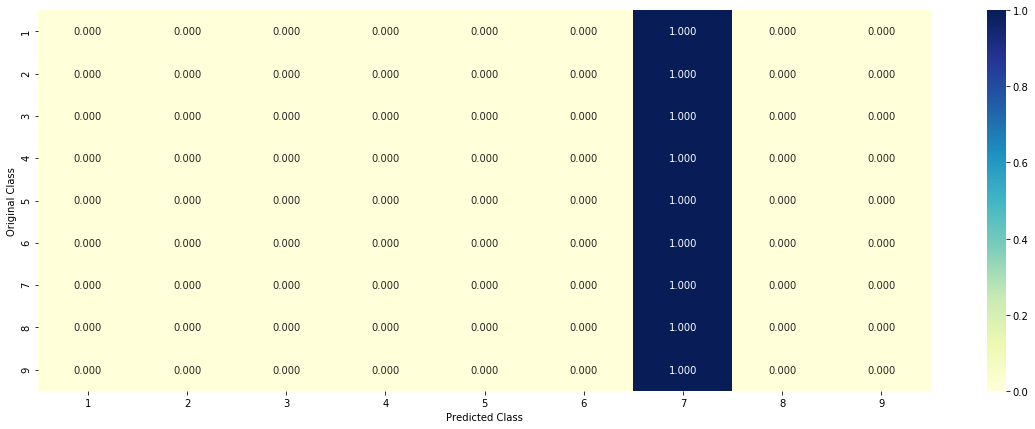

In [27]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

**5.5 Logistic Regression without Class Balancing**

**5.5.1 LR on Word2VEC**

In [28]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
#test_df = np.nan_to_num(test_df)

for alpha = 1e-06
Log Loss : 1.3518437943033537
for alpha = 1e-05
Log Loss : 1.3471445425066277
for alpha = 0.0001
Log Loss : 1.3415565518900436
for alpha = 0.001
Log Loss : 1.3099390380170872
for alpha = 0.01
Log Loss : 1.3280316772085197
for alpha = 0.1
Log Loss : 1.4247541601355984
for alpha = 1
Log Loss : 1.5458269744870943
for alpha = 10
Log Loss : 1.7309675857582472
for alpha = 100
Log Loss : 1.7770681237489079


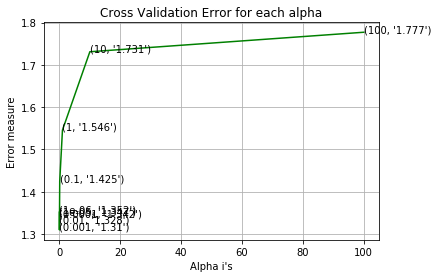

For values of best alpha =  0.001 The train log loss is: 1.2500642877717196
For values of best alpha =  0.001 The cross validation log loss is: 1.3035769593858697
For values of best alpha =  0.001 The test log loss is: 1.3354104381514345
Log loss : 1.3099390380170872
Number of mis-classified points : 0.45300751879699247
-------------------- Confusion matrix --------------------


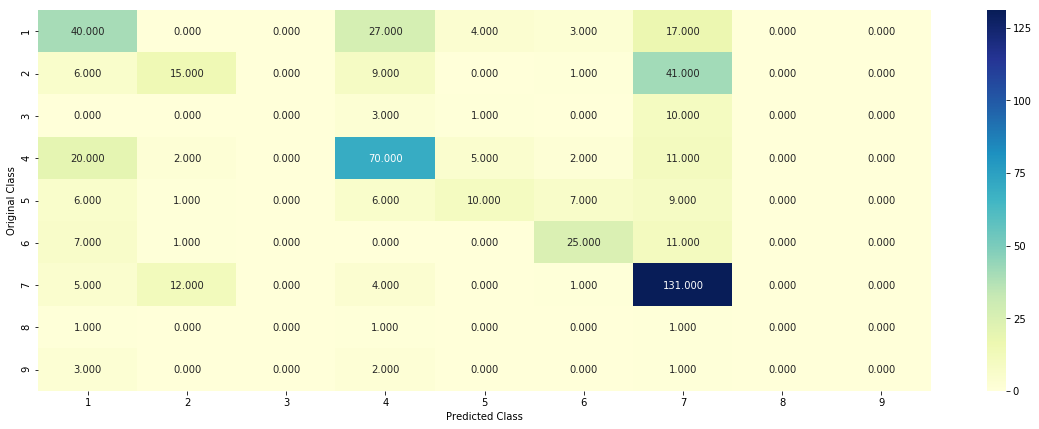

-------------------- Precision matrix (Columm Sum=1) --------------------


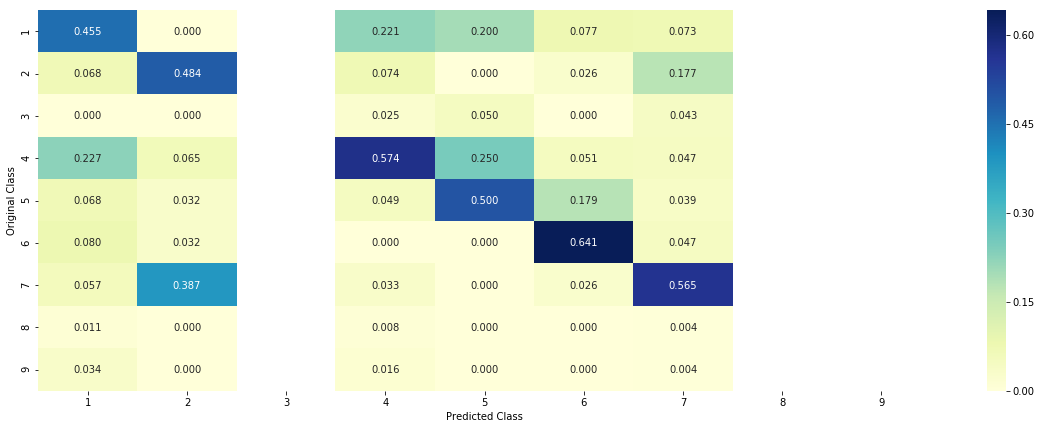

-------------------- Recall matrix (Row sum=1) --------------------


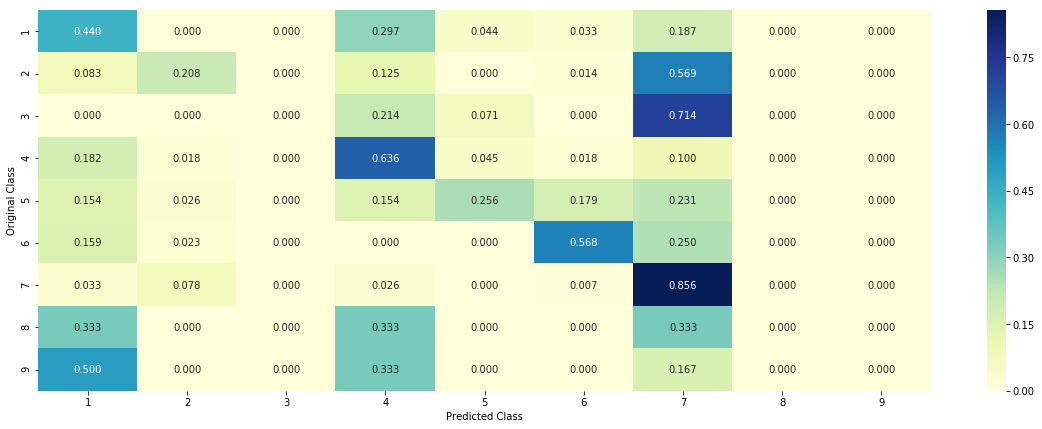

In [29]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

**5.5.2 LR on TF-IDF Word2VEC**

In [30]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

for alpha = 1e-06
Log Loss : 1.83025998055076
for alpha = 1e-05
Log Loss : 1.8302599804520105
for alpha = 0.0001
Log Loss : 1.830259980483551
for alpha = 0.001
Log Loss : 1.8302599804711963
for alpha = 0.01
Log Loss : 1.8302599804685278
for alpha = 0.1
Log Loss : 1.8302599802291089
for alpha = 1
Log Loss : 1.8302599804913475
for alpha = 10
Log Loss : 1.8302599810192788
for alpha = 100
Log Loss : 1.830259980644712


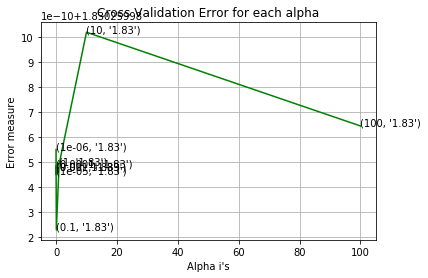

For values of best alpha =  0.1 The train log loss is: 1.8317745287708482
For values of best alpha =  0.1 The cross validation log loss is: 1.830259980488627
For values of best alpha =  0.1 The test log loss is: 1.8305971961298773
Log loss : 1.8302599802291089
Number of mis-classified points : 0.7124060150375939
-------------------- Confusion matrix --------------------


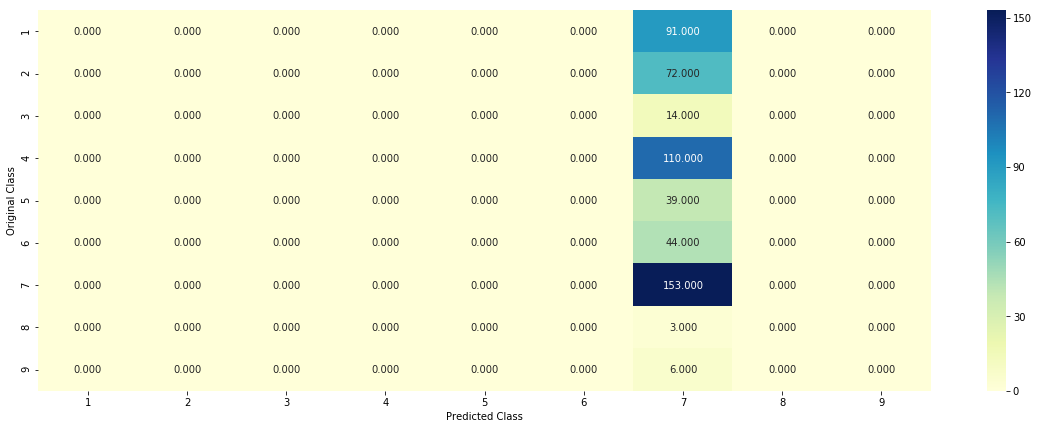

-------------------- Precision matrix (Columm Sum=1) --------------------


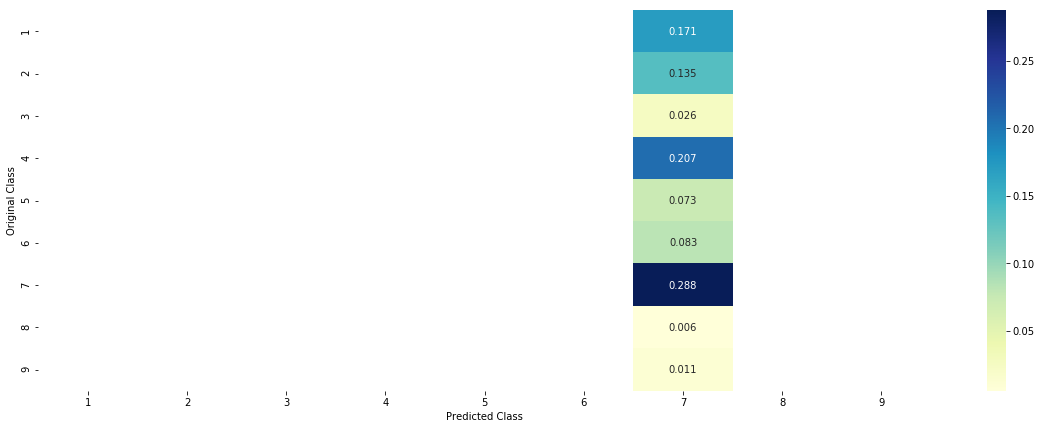

-------------------- Recall matrix (Row sum=1) --------------------


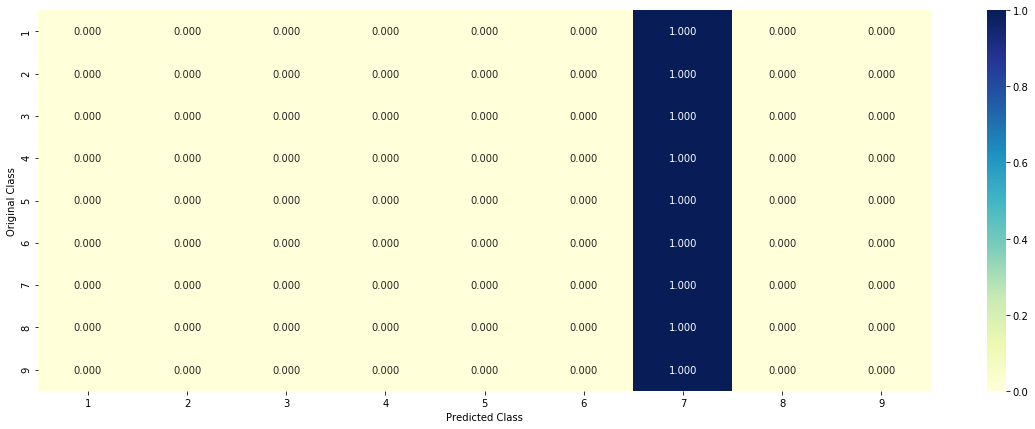

In [31]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

**5.6 Support Vector Classification**

**5.6.1 SVC on Word2VEC**

In [32]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
#test_df = np.nan_to_num(test_df)

for C = 1e-05
Log Loss : 1.5517585200965882
for C = 0.0001
Log Loss : 1.5726931327925608
for C = 0.001
Log Loss : 1.5755621272879403
for C = 0.01
Log Loss : 1.3967719262014615
for C = 0.1
Log Loss : 1.244674017494811
for C = 1
Log Loss : 1.2034292433342526
for C = 10
Log Loss : 1.228148756964771
for C = 100
Log Loss : 1.2105112785658132


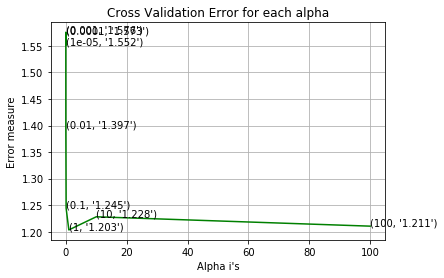

For values of best alpha =  1 The train log loss is: 1.1197087526073886
For values of best alpha =  1 The cross validation log loss is: 1.2218724613828118
For values of best alpha =  1 The test log loss is: 1.233819613649178
Log loss : 1.2034292433342526
Number of mis-classified points : 0.42857142857142855
-------------------- Confusion matrix --------------------


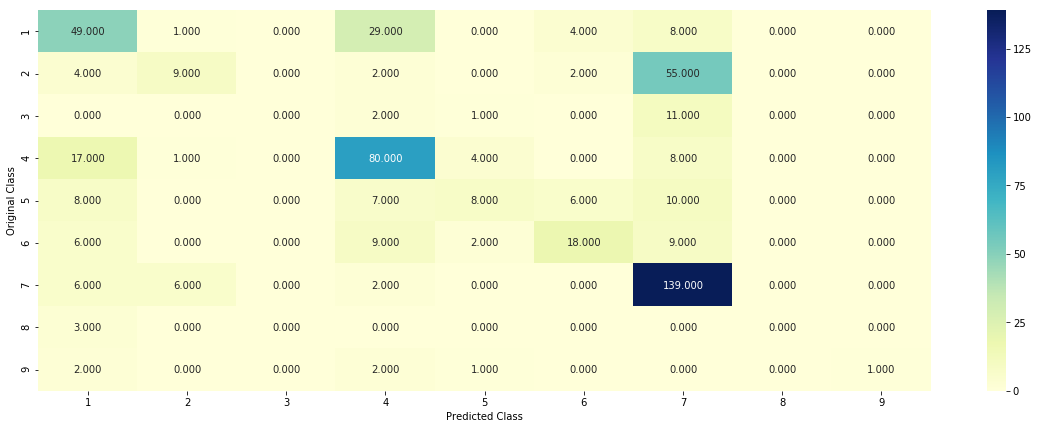

-------------------- Precision matrix (Columm Sum=1) --------------------


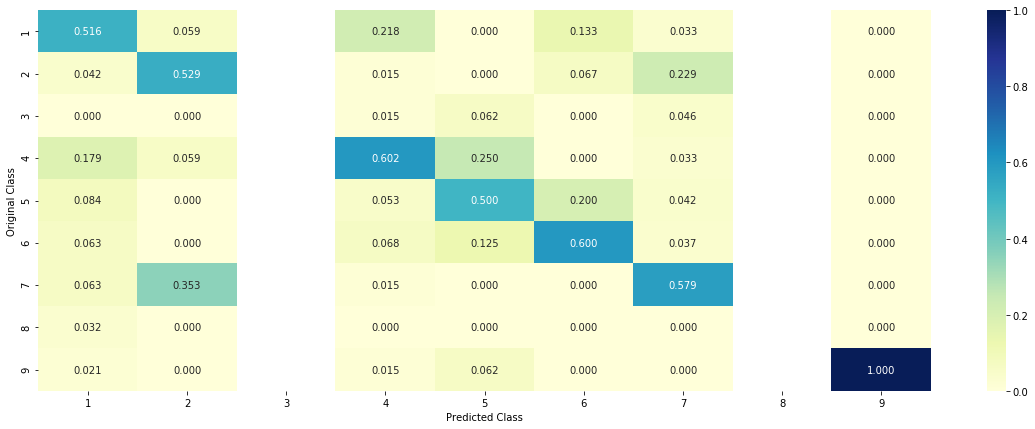

-------------------- Recall matrix (Row sum=1) --------------------


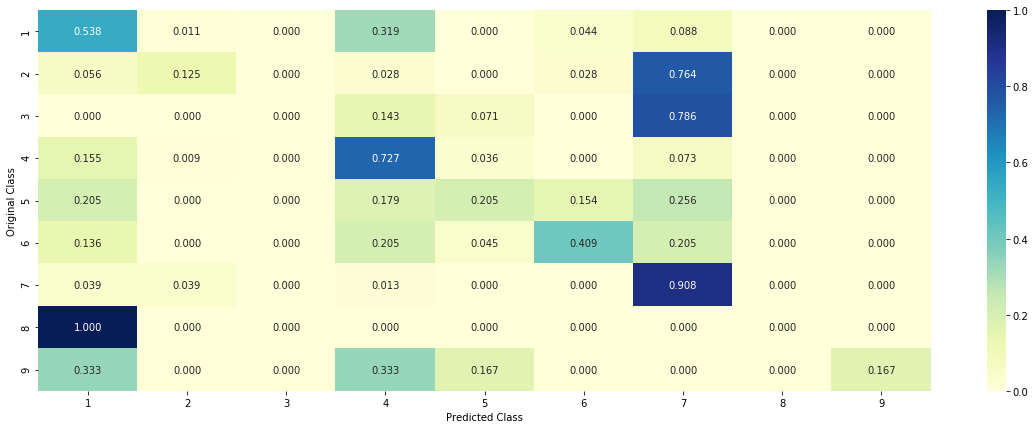

In [33]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    #clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
#clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
#clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

**5.6.2 SVC on TF-IDF Word2VEC**

In [34]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

for C = 1e-05
Log Loss : 1.830259980403841
for C = 0.0001
Log Loss : 1.8302599804818036
for C = 0.001
Log Loss : 1.8302599804700326
for C = 0.01
Log Loss : 1.8302599804121489
for C = 0.1
Log Loss : 1.8302599804950836
for C = 1
Log Loss : 1.8302599804931041
for C = 10
Log Loss : 1.8302599805888349
for C = 100
Log Loss : 1.8302599803518722


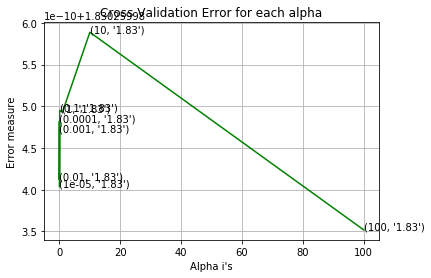

For values of best alpha =  100 The train log loss is: 1.8317745287412195
For values of best alpha =  100 The cross validation log loss is: 1.8302599804672242
For values of best alpha =  100 The test log loss is: 1.830597196195977
Log loss : 1.8302599803518722
Number of mis-classified points : 0.7124060150375939
-------------------- Confusion matrix --------------------


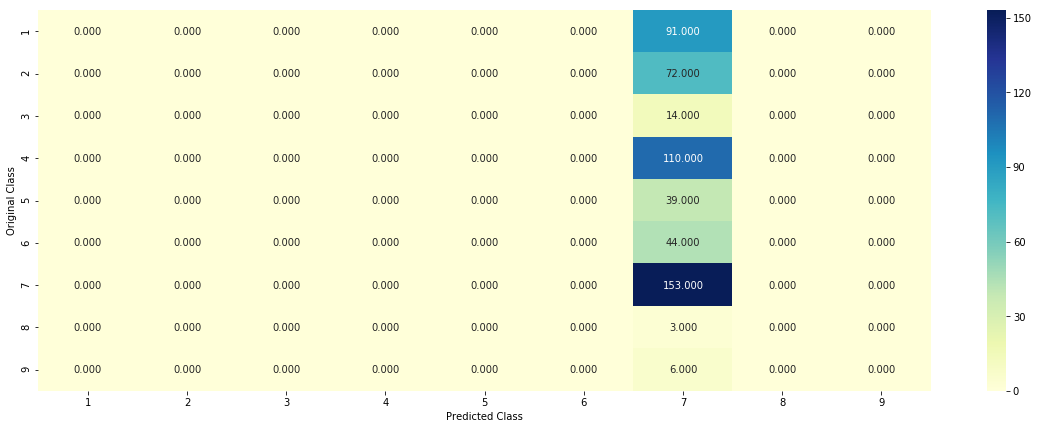

-------------------- Precision matrix (Columm Sum=1) --------------------


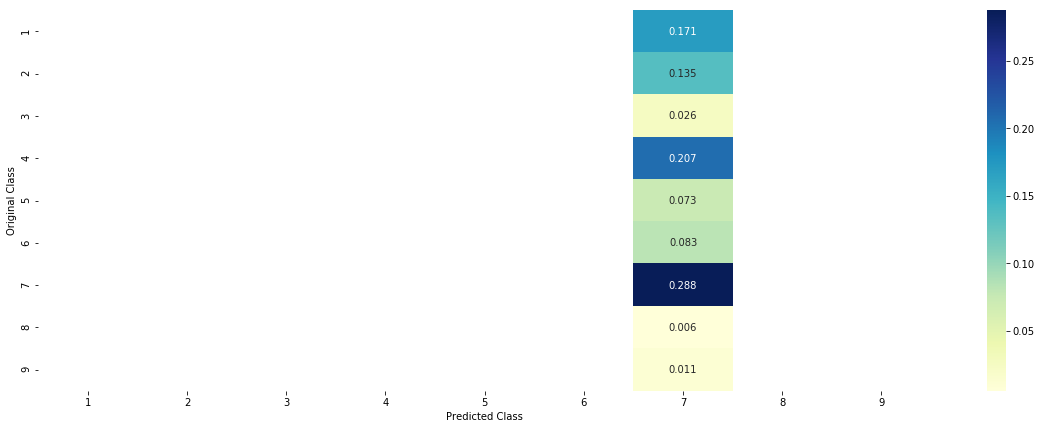

-------------------- Recall matrix (Row sum=1) --------------------


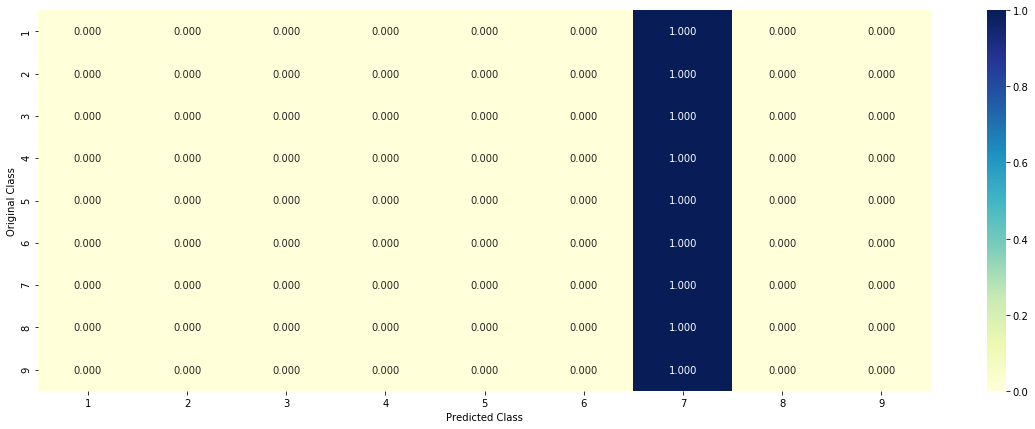

In [35]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    #clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
#clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
#clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

**5.7 Linear Support Vector Machines**

**5.7.1 SVM on Word2VEC**

In [36]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
#test_df = np.nan_to_num(test_df)

for C = 1e-05
Log Loss : 1.4212910118720476
for C = 0.0001
Log Loss : 1.40640822692473
for C = 0.001
Log Loss : 1.4034614909679883
for C = 0.01
Log Loss : 1.4112863148907222
for C = 0.1
Log Loss : 1.4584440246216392
for C = 1
Log Loss : 1.5123187486069278
for C = 10
Log Loss : 1.790044275973507
for C = 100
Log Loss : 1.8142635471271593


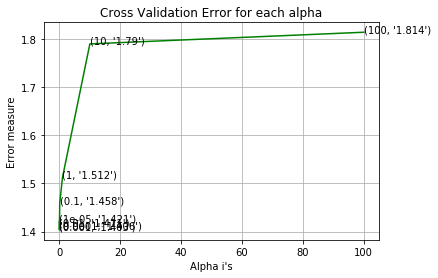

For values of best alpha =  0.001 The train log loss is: 1.2730816665886797
For values of best alpha =  0.001 The cross validation log loss is: 1.4034614909679883
For values of best alpha =  0.001 The test log loss is: 1.3799092298958877
Log loss : 1.4034614909679883
Number of mis-classified points : 0.4906015037593985
-------------------- Confusion matrix --------------------


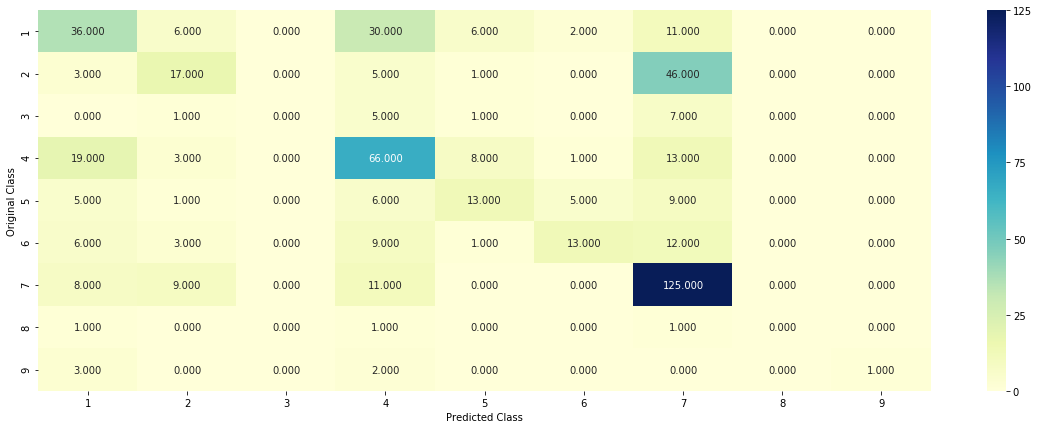

-------------------- Precision matrix (Columm Sum=1) --------------------


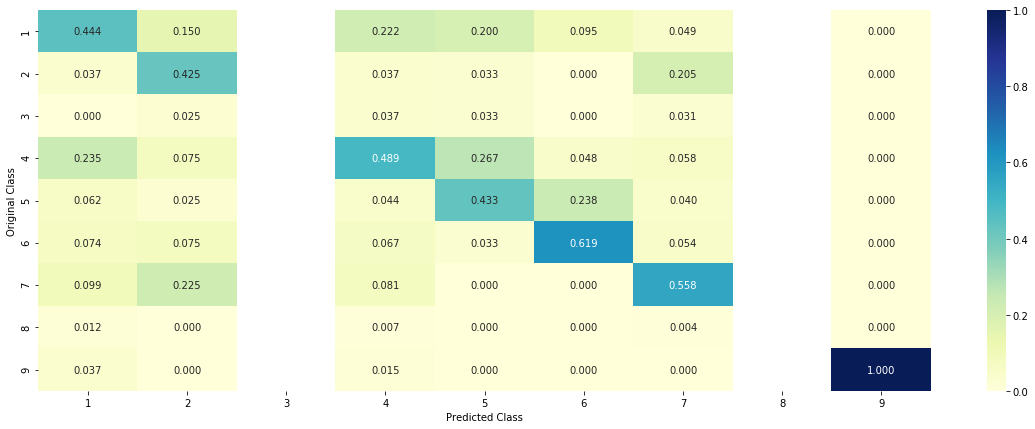

-------------------- Recall matrix (Row sum=1) --------------------


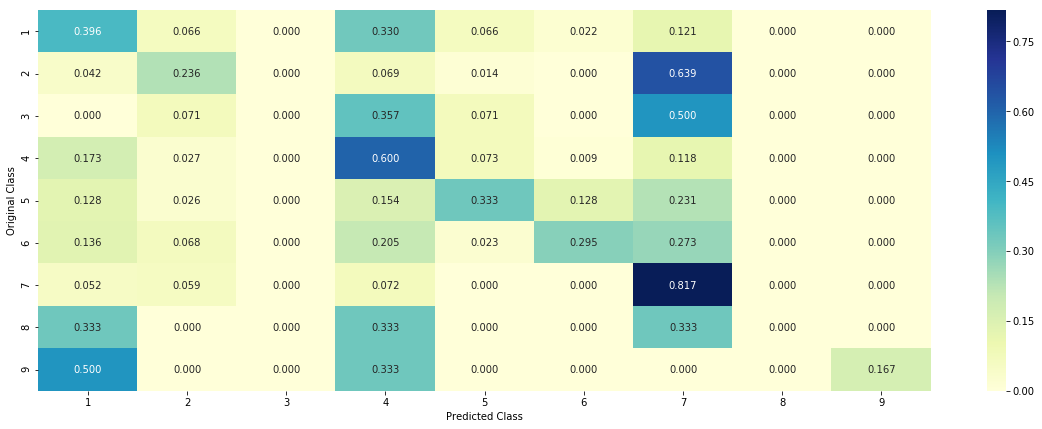

In [37]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    #clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
#clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

**5.7.2 SVM on TF-IDF Word2VEC**

In [38]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

for C = 1e-05
Log Loss : 1.8302599804861444
for C = 0.0001
Log Loss : 1.830259980580875
for C = 0.001
Log Loss : 1.830259980630335
for C = 0.01
Log Loss : 1.8302599806155444
for C = 0.1
Log Loss : 1.8302599806143542
for C = 1
Log Loss : 1.830259980614024
for C = 10
Log Loss : 1.8302599806164497
for C = 100
Log Loss : 1.8302599807354534


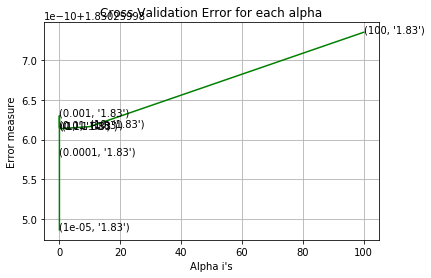

For values of best alpha =  1e-05 The train log loss is: 1.8317745287735334
For values of best alpha =  1e-05 The cross validation log loss is: 1.8302599804861444
For values of best alpha =  1e-05 The test log loss is: 1.8305971961025125
Log loss : 1.8302599804861444
Number of mis-classified points : 0.7124060150375939
-------------------- Confusion matrix --------------------


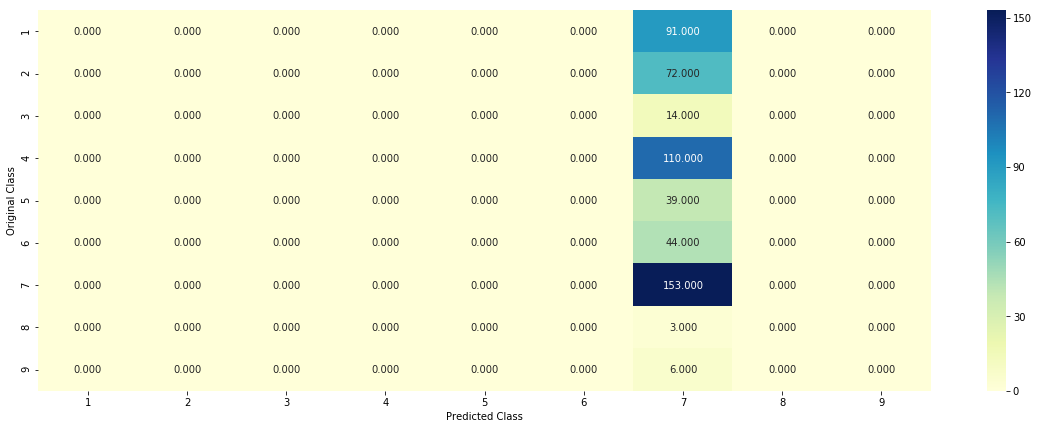

-------------------- Precision matrix (Columm Sum=1) --------------------


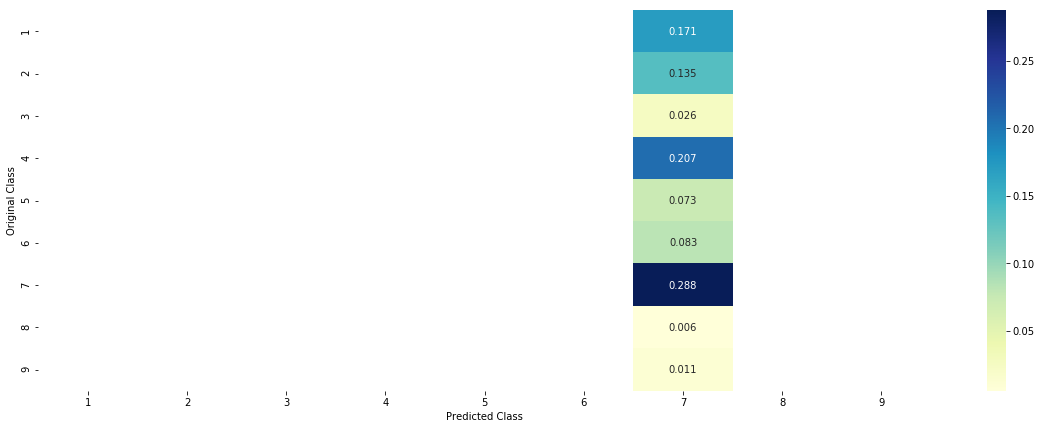

-------------------- Recall matrix (Row sum=1) --------------------


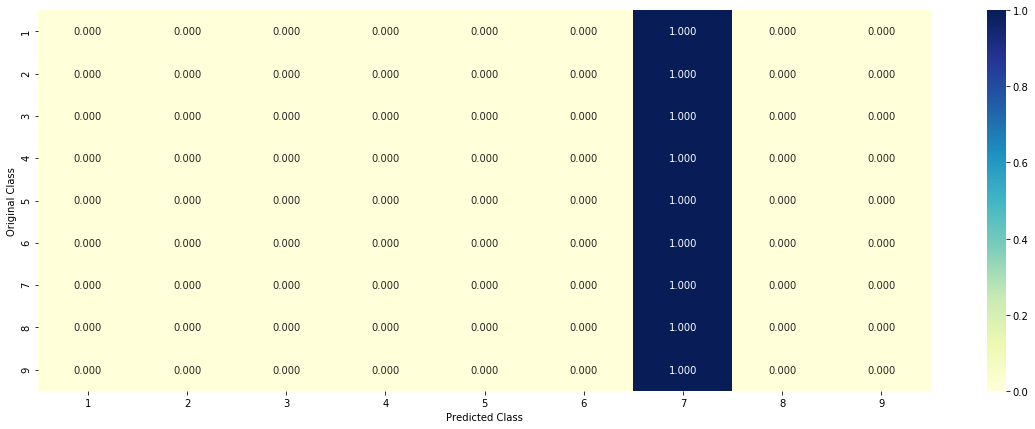

In [39]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    #clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_array)
#clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

# 5.8 Random Forest

**5.8.1 Random Forest on Word2VEC**

In [40]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
#test_df = np.nan_to_num(test_df)

for n_estimators = 100 and max depth =  5
Log Loss : 1.215166327564876
for n_estimators = 100 and max depth =  10
Log Loss : 1.0900552711757803
for n_estimators = 200 and max depth =  5
Log Loss : 1.2152445274941228
for n_estimators = 200 and max depth =  10
Log Loss : 1.0874605501261017
for n_estimators = 500 and max depth =  5
Log Loss : 1.211068531885233
for n_estimators = 500 and max depth =  10
Log Loss : 1.0849345501920178
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2095883493505284
for n_estimators = 1000 and max depth =  10
Log Loss : 1.083776028660023
for n_estimators = 2000 and max depth =  5
Log Loss : 1.2084455991338954
for n_estimators = 2000 and max depth =  10
Log Loss : 1.083035480755861
For values of best estimator =  2000 The train log loss is: 0.6296948695072486
For values of best estimator =  2000 The cross validation log loss is: 1.083035480755861
For values of best estimator =  2000 The test log loss is: 1.1794473979882891
Log loss : 1.083035480755861


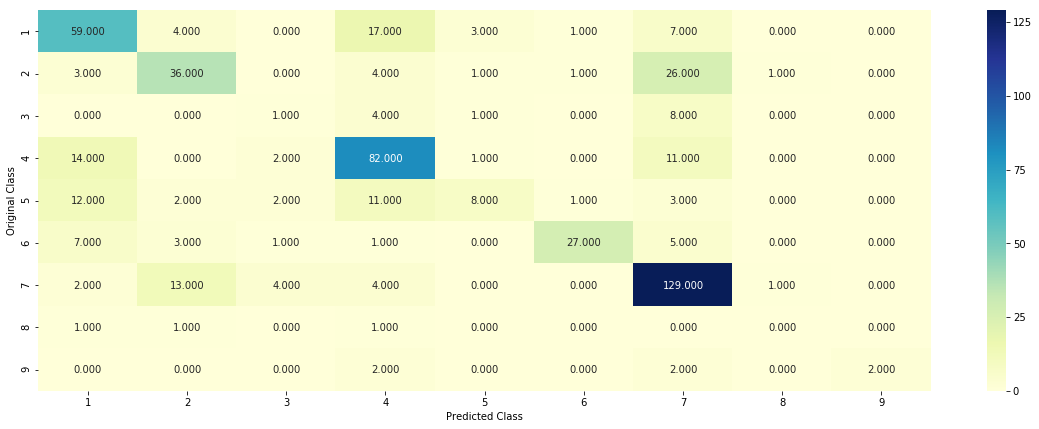

-------------------- Precision matrix (Columm Sum=1) --------------------


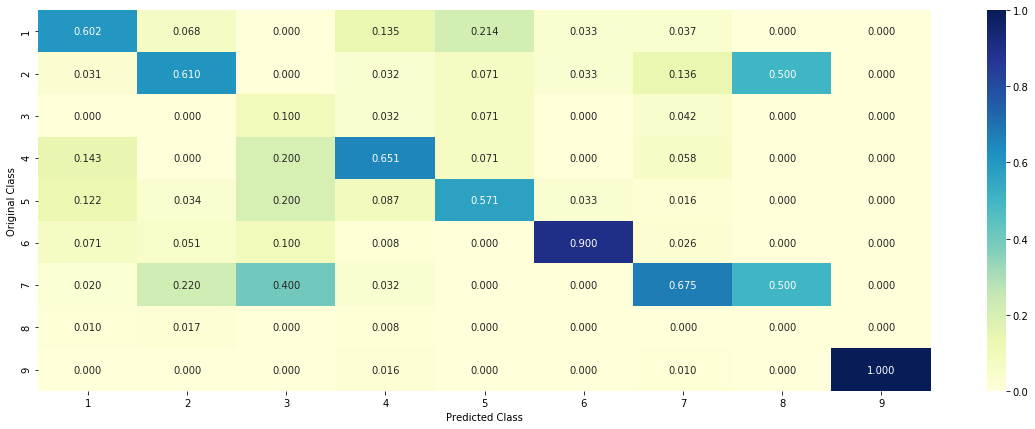

-------------------- Recall matrix (Row sum=1) --------------------


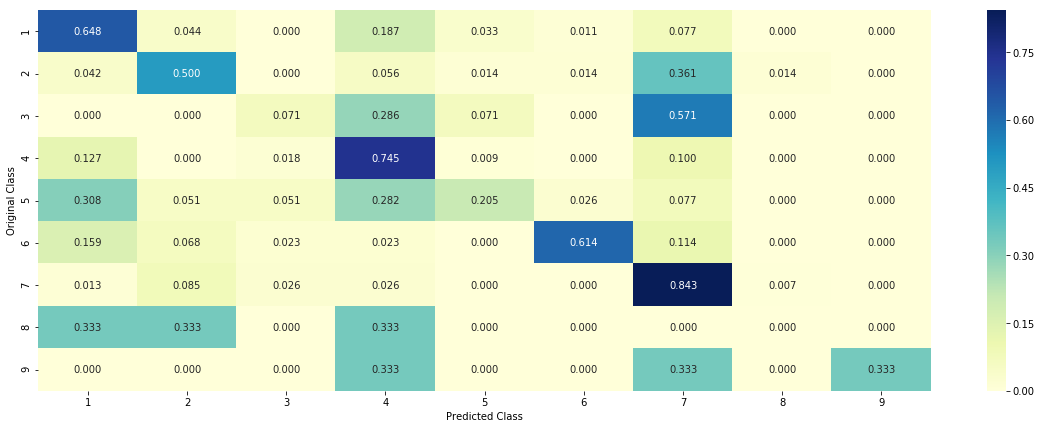

In [41]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

**5.8.2 Random Forest on TF-IDF Word2VEC**

In [42]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

for n_estimators = 100 and max depth =  5
Log Loss : 1.8302599806224273
for n_estimators = 100 and max depth =  10
Log Loss : 1.8302599806224273
for n_estimators = 200 and max depth =  5
Log Loss : 1.830259980622427
for n_estimators = 200 and max depth =  10
Log Loss : 1.830259980622427
for n_estimators = 500 and max depth =  5
Log Loss : 1.8302599806224258
for n_estimators = 500 and max depth =  10
Log Loss : 1.8302599806224253
for n_estimators = 1000 and max depth =  5
Log Loss : 1.830259980622428
for n_estimators = 1000 and max depth =  10
Log Loss : 1.830259980622428
for n_estimators = 2000 and max depth =  5
Log Loss : 1.830259980622428
for n_estimators = 2000 and max depth =  10
Log Loss : 1.830259980622428
For values of best estimator =  500 The train log loss is: 1.8317745288819167
For values of best estimator =  500 The cross validation log loss is: 1.8302599806224258
For values of best estimator =  500 The test log loss is: 1.8305971962330092
Log loss : 1.8302599806224256
Num

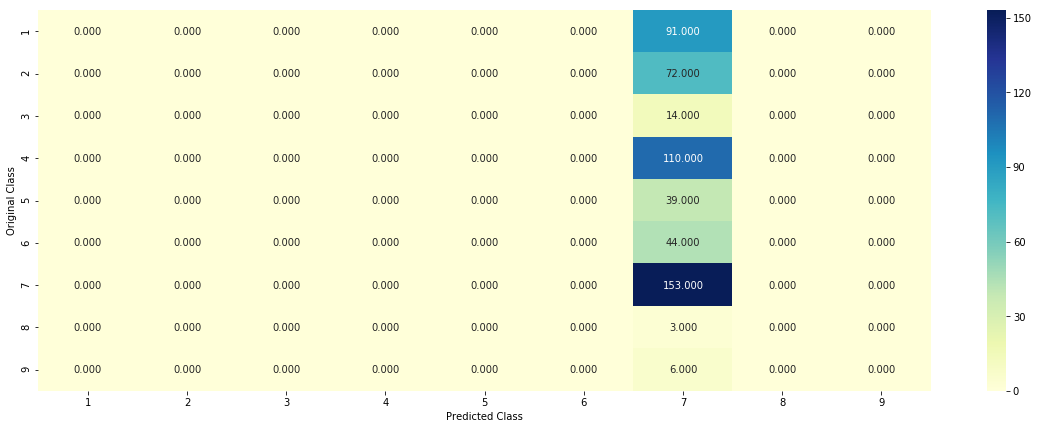

-------------------- Precision matrix (Columm Sum=1) --------------------


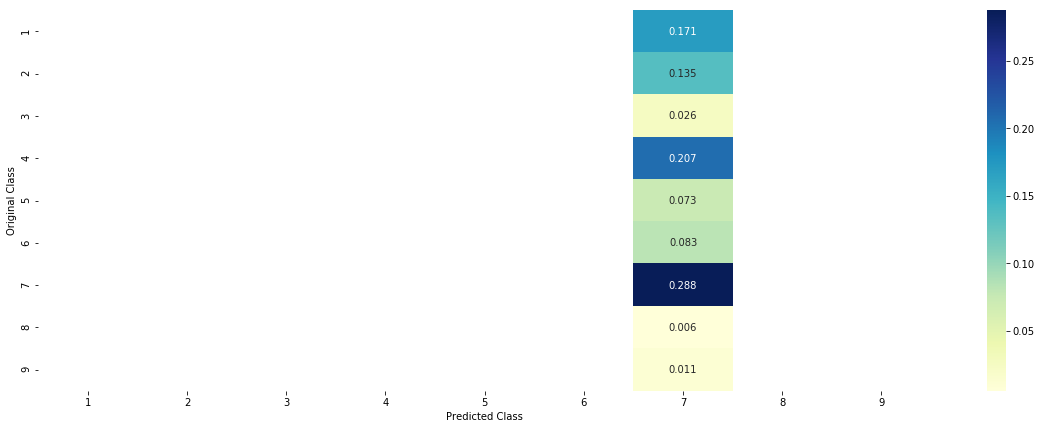

-------------------- Recall matrix (Row sum=1) --------------------


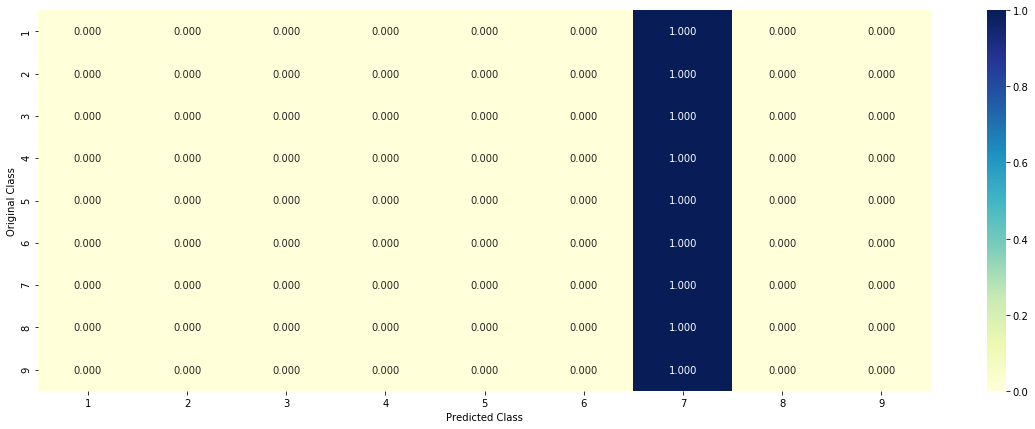

In [43]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

# 6. Stacking Models [Logistic, SVC and Naive Bayes]

**6.1.1 On Word2VEC**

In [47]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

In [48]:
clf1 = SGDClassifier(alpha=0.01, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_df, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SVC(C=100,kernel='linear',probability=True, class_weight='balanced')
clf2.fit(train_df, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, n_jobs=-1)
clf3.fit(train_df, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_df, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
sig_clf2.fit(train_df, y_train)
print("Support vector classifier : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_df))))
sig_clf3.fit(train_df, y_train)
print("Random Forest : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv_df))))
print("-"*50)
alpha = [5, 11, 15, 21, 31, 41, 51, 99] 
best_alpha = 999
for i in alpha:
    knn = KNeighborsClassifier(n_neighbors=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=knn, use_probas=True)
    sclf.fit(train_df, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_df))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_df))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.31
Support vector classifier : Log Loss: 1.26
Random Forest : Log Loss: 1.12
--------------------------------------------------
Stacking Classifer : for the value of alpha: 5.000000 Log Loss: 8.953
Stacking Classifer : for the value of alpha: 11.000000 Log Loss: 7.017
Stacking Classifer : for the value of alpha: 15.000000 Log Loss: 6.066
Stacking Classifer : for the value of alpha: 21.000000 Log Loss: 5.493
Stacking Classifer : for the value of alpha: 31.000000 Log Loss: 4.198
Stacking Classifer : for the value of alpha: 41.000000 Log Loss: 3.730
Stacking Classifer : for the value of alpha: 51.000000 Log Loss: 3.445
Stacking Classifer : for the value of alpha: 99.000000 Log Loss: 2.663


Log loss (train) on the stacking classifier : 0.4334035440206393
Log loss (CV) on the stacking classifier : 8.568384798851923
Log loss (test) on the stacking classifier : 8.043242125229124
Number of missclassified point : 0.38345864661654133
-------------------- Confusion matrix --------------------


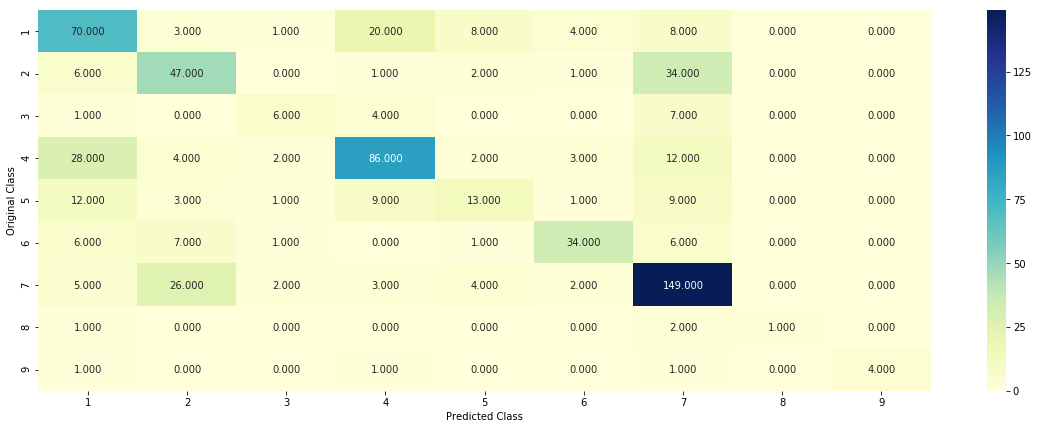

-------------------- Precision matrix (Columm Sum=1) --------------------


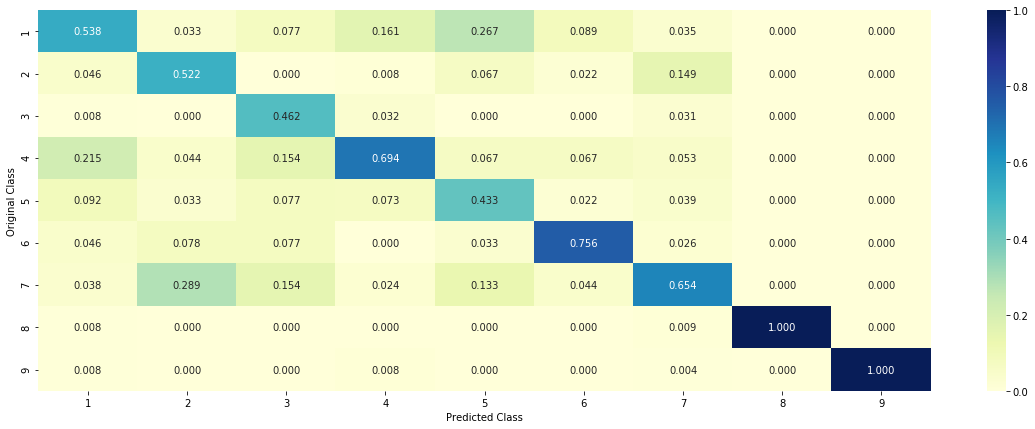

-------------------- Recall matrix (Row sum=1) --------------------


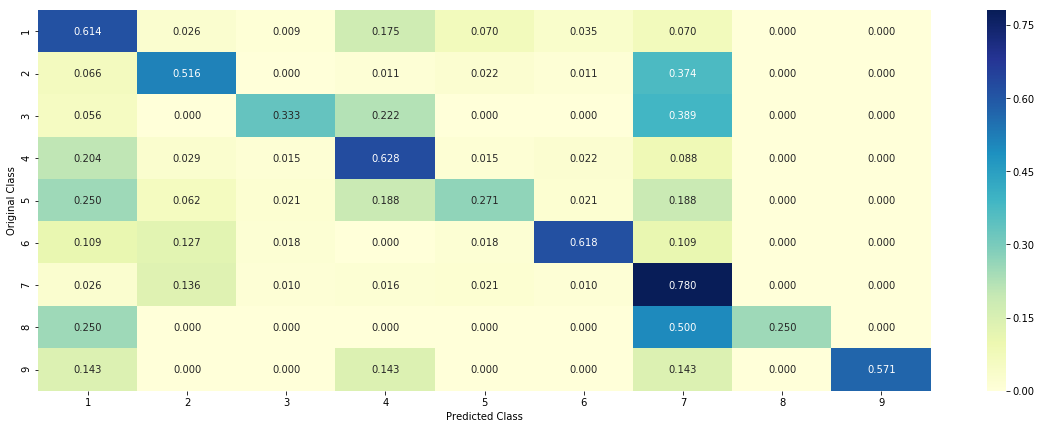

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=knn, use_probas=True)
sclf.fit(train_df, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_df))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_df))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_df))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=sclf.predict(test_df))

**6.1.2 On TF-IDF Word2VEC**

In [50]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

In [51]:
clf1 = SGDClassifier(alpha=0.01, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_df, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SVC(C=100,kernel='linear',probability=True, class_weight='balanced')
clf2.fit(train_df, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, n_jobs=-1)
clf3.fit(train_df, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_df, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
sig_clf2.fit(train_df, y_train)
print("Support vector classifier : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_df))))
sig_clf3.fit(train_df, y_train)
print("Random Forest : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv_df))))
print("-"*50)
alpha = [5, 11, 15, 21, 31, 41, 51, 99] 
best_alpha = 999
for i in alpha:
    knn = KNeighborsClassifier(n_neighbors=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=knn, use_probas=True)
    sclf.fit(train_df, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_df))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_df))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.83
Support vector classifier : Log Loss: 1.83
Random Forest : Log Loss: 1.83
--------------------------------------------------
Stacking Classifer : for the value of alpha: 5.000000 Log Loss: 8.666
Stacking Classifer : for the value of alpha: 11.000000 Log Loss: 2.260
Stacking Classifer : for the value of alpha: 15.000000 Log Loss: 2.075
Stacking Classifer : for the value of alpha: 21.000000 Log Loss: 2.090
Stacking Classifer : for the value of alpha: 31.000000 Log Loss: 2.043
Stacking Classifer : for the value of alpha: 41.000000 Log Loss: 2.012
Stacking Classifer : for the value of alpha: 51.000000 Log Loss: 2.002
Stacking Classifer : for the value of alpha: 99.000000 Log Loss: 2.008


Log loss (train) on the stacking classifier : 8.679013405847156
Log loss (CV) on the stacking classifier : 8.665724730107659
Log loss (test) on the stacking classifier : 8.690483631222303
Number of missclassified point : 0.8631578947368421
-------------------- Confusion matrix --------------------


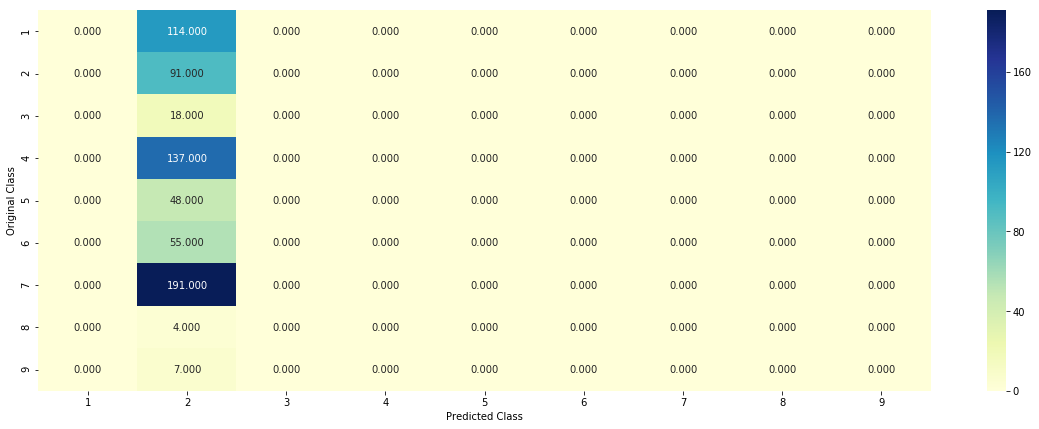

-------------------- Precision matrix (Columm Sum=1) --------------------


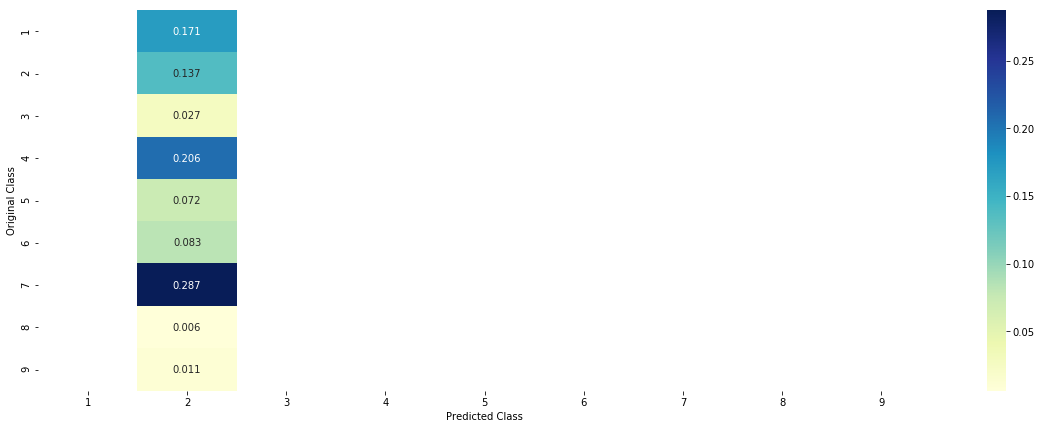

-------------------- Recall matrix (Row sum=1) --------------------


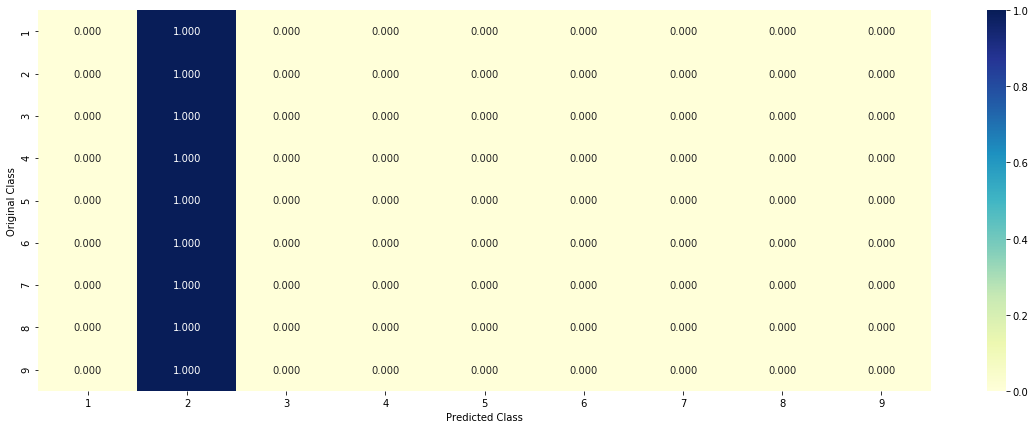

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=knn, use_probas=True)
sclf.fit(train_df, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_df))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_df))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_df))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=sclf.predict(test_df))

# 6.2 Stacking Models [Linear,K-NN, Logistic]

**6.2.1 On Word2VEC**

In [64]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

In [65]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_df, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SVC(C=100,kernel='linear',probability=True, class_weight='balanced')
clf2.fit(train_df, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(train_df, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_df, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
sig_clf2.fit(train_df, y_train)
print("Support vector classification : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
sig_clf3.fit(train_df, y_train)
print("K-NN : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
print("-"*50)
alpha = [100,200,500,1000,2000] 
best_alpha = 999
for i in alpha:
    rf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=10, n_jobs=-1)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=rf, use_probas=True)
    sclf.fit(train_df, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_df))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_df))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.34
Support vector classification : Log Loss: 1.34
K-NN : Log Loss: 1.34
--------------------------------------------------
Stacking Classifer : for the value of alpha: 100.000000 Log Loss: 1.219
Stacking Classifer : for the value of alpha: 200.000000 Log Loss: 1.212
Stacking Classifer : for the value of alpha: 500.000000 Log Loss: 1.208
Stacking Classifer : for the value of alpha: 1000.000000 Log Loss: 1.204
Stacking Classifer : for the value of alpha: 2000.000000 Log Loss: 1.204


Log loss (train) on the stacking classifier : 0.4373048877401367
Log loss (CV) on the stacking classifier : 1.2010245195577256
Log loss (test) on the stacking classifier : 1.1471699667900832
Number of missclassified point : 0.4150375939849624
-------------------- Confusion matrix --------------------


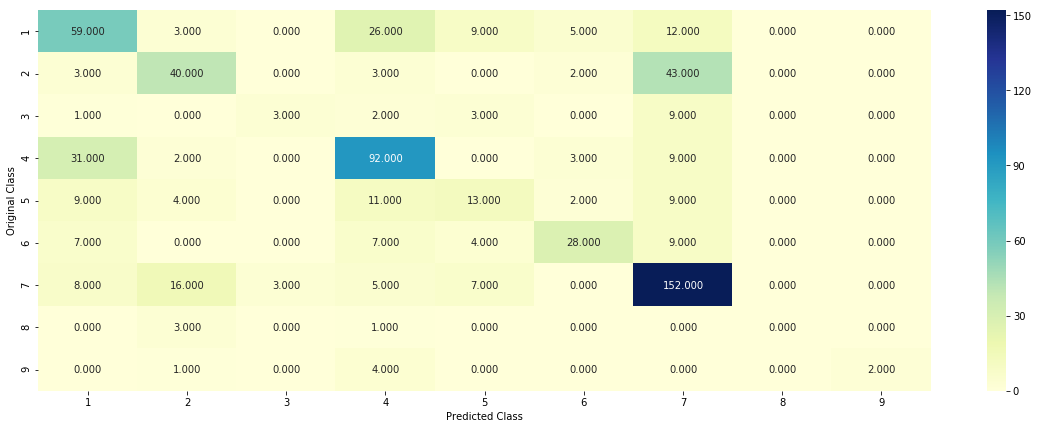

-------------------- Precision matrix (Columm Sum=1) --------------------


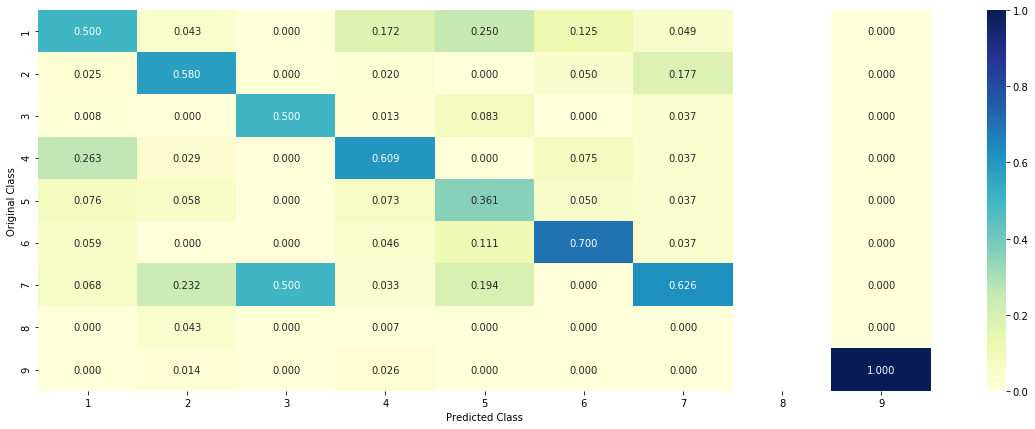

-------------------- Recall matrix (Row sum=1) --------------------


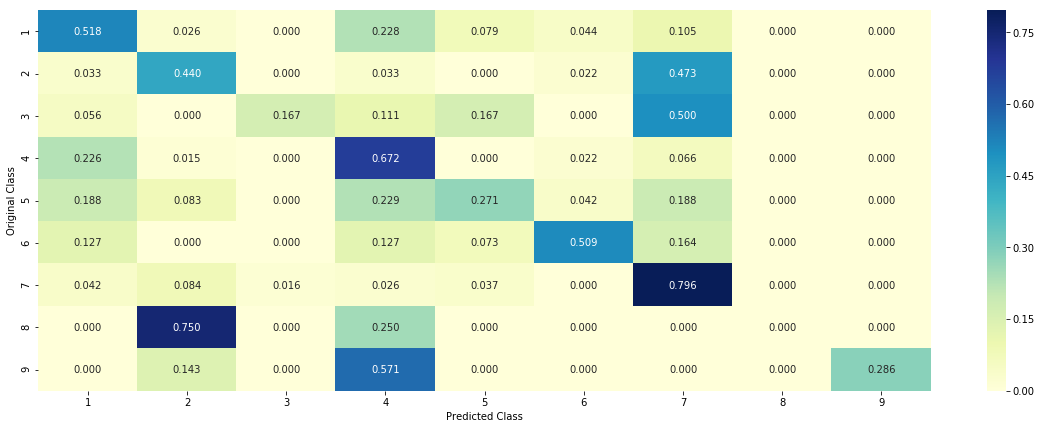

In [67]:
rf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, n_jobs=-1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=rf, use_probas=True)
sclf.fit(train_df, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_df))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_df))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_df))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=sclf.predict(test_df))

**6.2.2 On TF-IDF Word2VEC**

In [68]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

In [71]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_df, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SVC(C=100,kernel='linear',probability=True, class_weight='balanced')
clf2.fit(train_df, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(train_df, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_df, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
sig_clf2.fit(train_df, y_train)
print("Support vector classification : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_df))))
sig_clf3.fit(train_df, y_train)
print("K-NN : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv_df))))
print("-"*50)
alpha = [100,200,500,1000,2000] 
best_alpha = 999
for i in alpha:
    rf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=10, n_jobs=-1)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=rf, use_probas=True)
    sclf.fit(train_df, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_df))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_df))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.83
Support vector classification : Log Loss: 1.83
K-NN : Log Loss: 1.83
--------------------------------------------------
Stacking Classifer : for the value of alpha: 100.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 200.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 500.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 1000.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 2000.000000 Log Loss: 1.830


Log loss (train) on the stacking classifier : 1.831754564762726
Log loss (CV) on the stacking classifier : 1.8302399263627829
Log loss (test) on the stacking classifier : 1.8305758067664655
Number of missclassified point : 0.7127819548872181
-------------------- Confusion matrix --------------------


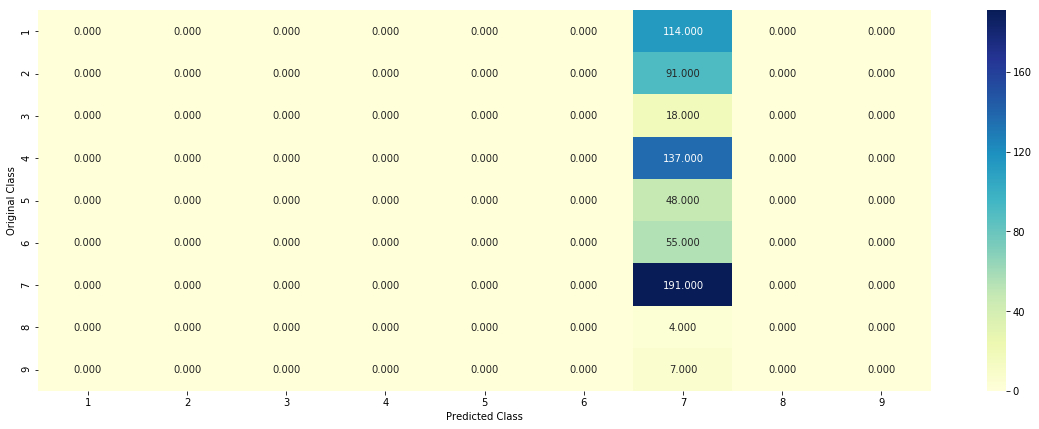

-------------------- Precision matrix (Columm Sum=1) --------------------


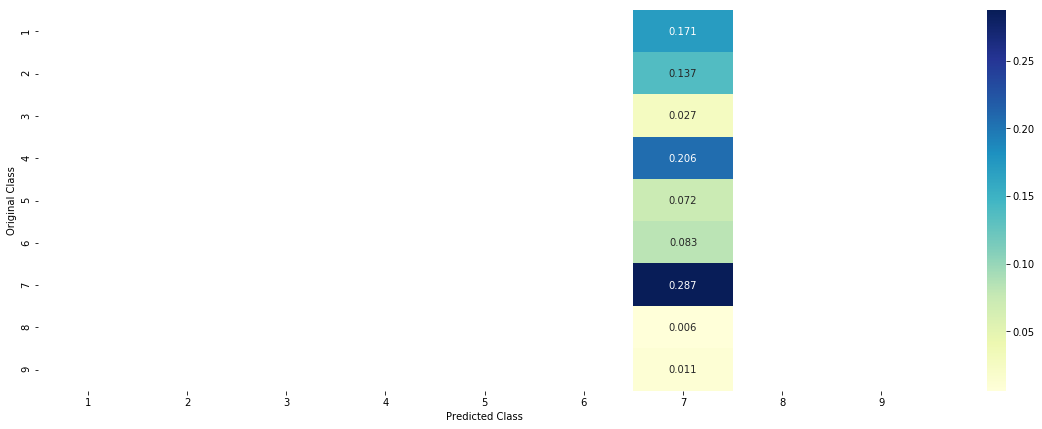

-------------------- Recall matrix (Row sum=1) --------------------


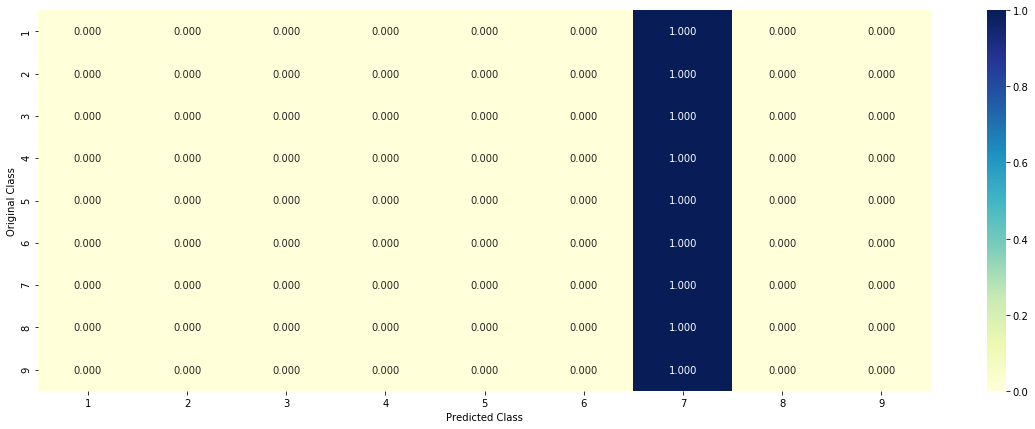

In [72]:
rf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, n_jobs=-1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=rf, use_probas=True)
sclf.fit(train_df, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_df))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_df))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_df))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=sclf.predict(test_df))

# 6.3 Stacking Models [KNN & SVC]

**6.3.1 On Word2VEC**

In [73]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

In [74]:
clf1 = SVC(C=100,kernel='linear',probability=True, class_weight='balanced')
clf1.fit(train_df, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(train_df, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

sig_clf1.fit(train_df, y_train)
print("Support vector classification : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
sig_clf2.fit(train_df, y_train)
print("K-NN : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_df))))
print("-"*50)
alpha = [100,200,500,1000,2000] 
best_alpha = 999
for i in alpha:
    rf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=10, n_jobs=-1)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2,], meta_classifier=rf, use_probas=True)
    sclf.fit(train_df, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_df))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_df))
    if best_alpha > log_error:
        best_alpha = log_error

Support vector classification : Log Loss: 1.26
K-NN : Log Loss: 1.22
--------------------------------------------------
Stacking Classifer : for the value of alpha: 100.000000 Log Loss: 1.131
Stacking Classifer : for the value of alpha: 200.000000 Log Loss: 1.121
Stacking Classifer : for the value of alpha: 500.000000 Log Loss: 1.055
Stacking Classifer : for the value of alpha: 1000.000000 Log Loss: 1.059
Stacking Classifer : for the value of alpha: 2000.000000 Log Loss: 1.058


Log loss (train) on the stacking classifier : 0.4510948921707278
Log loss (CV) on the stacking classifier : 1.0590836644853452
Log loss (test) on the stacking classifier : 1.088791869664663
Number of missclassified point : 0.3774436090225564
-------------------- Confusion matrix --------------------


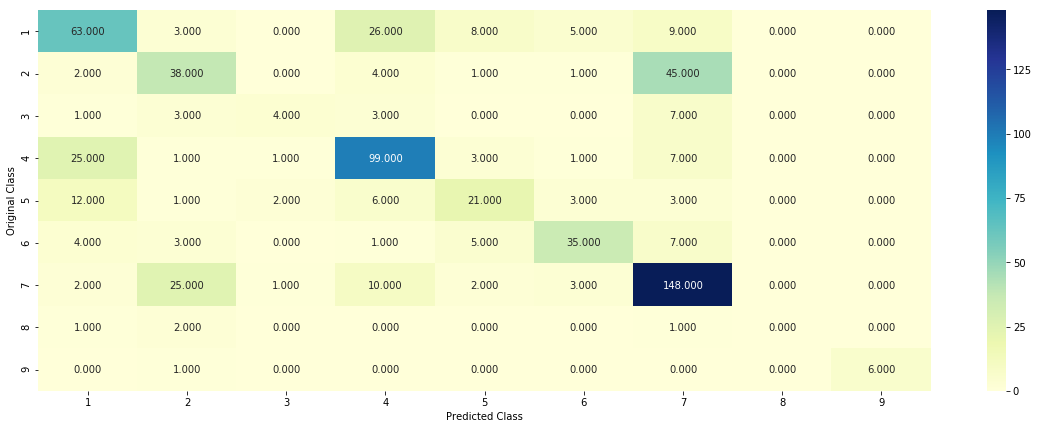

-------------------- Precision matrix (Columm Sum=1) --------------------


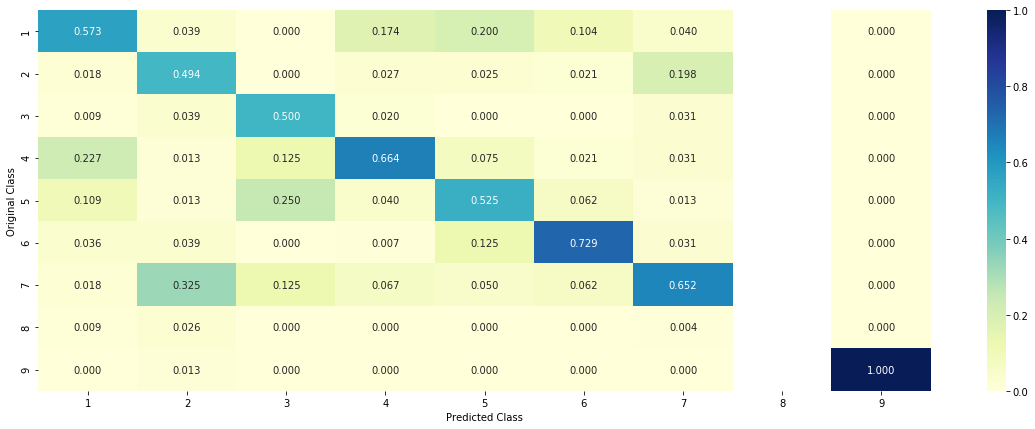

-------------------- Recall matrix (Row sum=1) --------------------


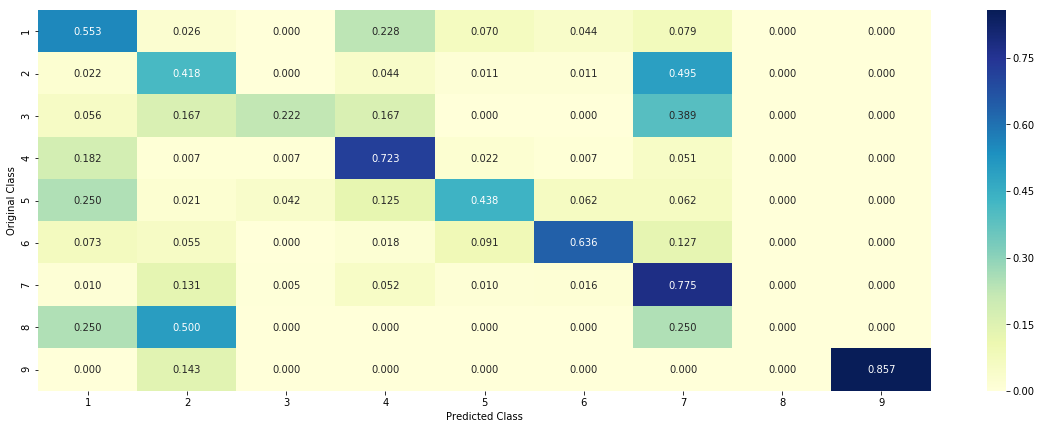

In [75]:
rf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, n_jobs=-1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2], meta_classifier=rf, use_probas=True)
sclf.fit(train_df, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_df))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_df))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_df))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=sclf.predict(test_df))

**6.3.2 On TF-IDF Word2VEC**

In [76]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

In [77]:
clf1 = SVC(C=100,kernel='linear',probability=True, class_weight='balanced')
clf1.fit(train_df, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(train_df, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

sig_clf1.fit(train_df, y_train)
print("Support vector classification : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))
sig_clf2.fit(train_df, y_train)
print("K-NN : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_df))))
print("-"*50)
alpha = [100,200,500,1000,2000] 
best_alpha = 999
for i in alpha:
    rf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=10, n_jobs=-1)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2,], meta_classifier=rf, use_probas=True)
    sclf.fit(train_df,y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_df))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_df))
    if best_alpha > log_error:
        best_alpha = log_error

Support vector classification : Log Loss: 1.83
K-NN : Log Loss: 1.83
--------------------------------------------------
Stacking Classifer : for the value of alpha: 100.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 200.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 500.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 1000.000000 Log Loss: 1.830
Stacking Classifer : for the value of alpha: 2000.000000 Log Loss: 1.830


Log loss (train) on the stacking classifier : 1.8317536343462513
Log loss (CV) on the stacking classifier : 1.8302321775639887
Log loss (test) on the stacking classifier : 1.830584938679137
Number of missclassified point : 0.7127819548872181
-------------------- Confusion matrix --------------------


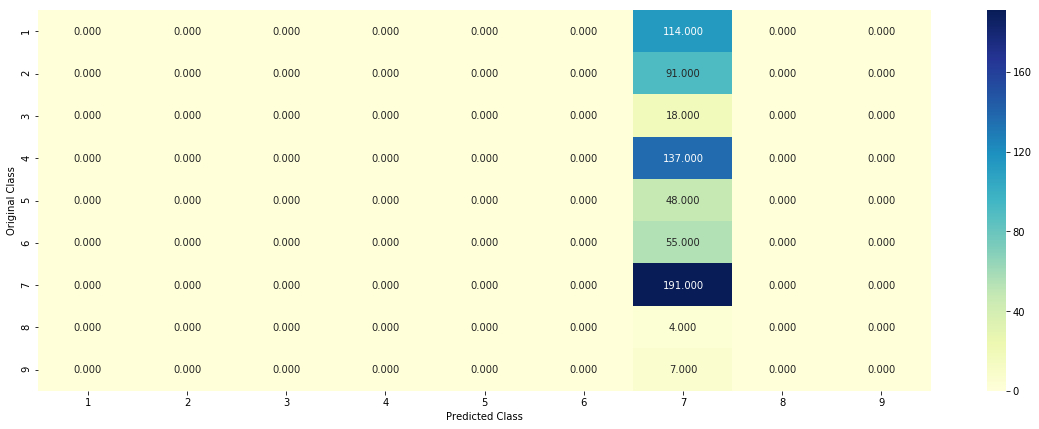

-------------------- Precision matrix (Columm Sum=1) --------------------


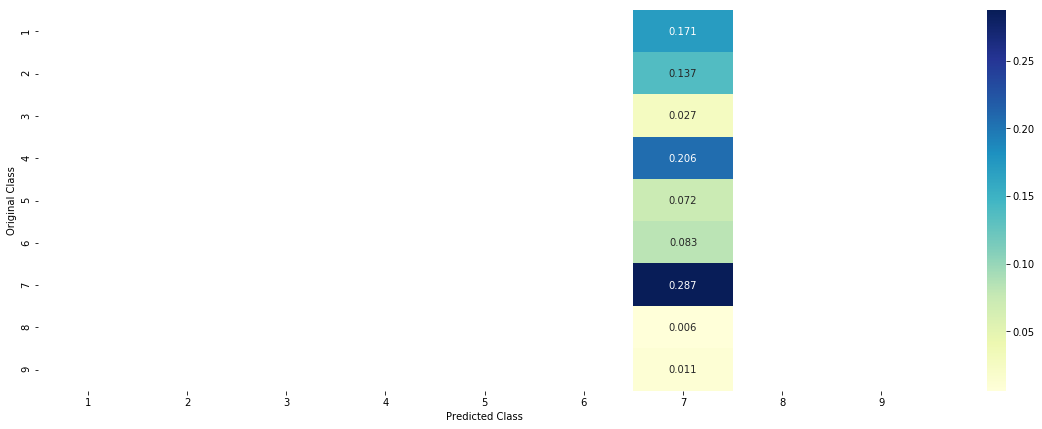

-------------------- Recall matrix (Row sum=1) --------------------


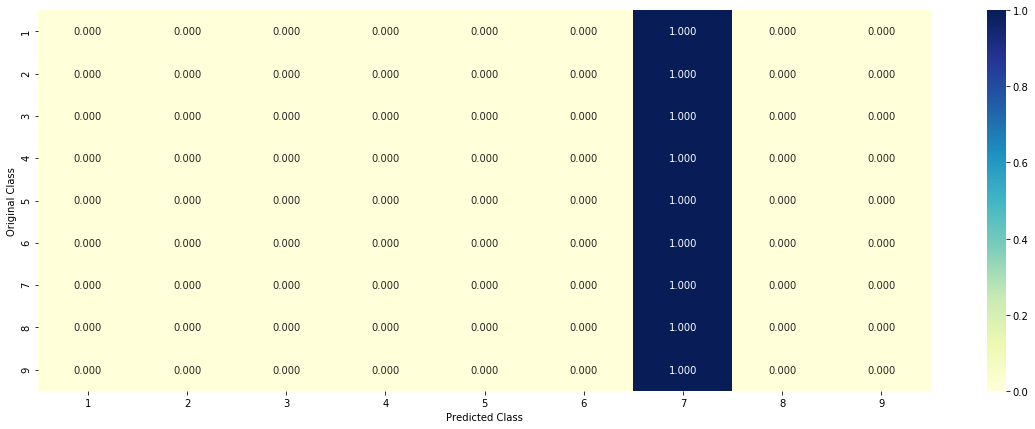

In [78]:
rf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, n_jobs=-1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2], meta_classifier=rf, use_probas=True)
sclf.fit(train_df, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_df))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_df))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_df))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=sclf.predict(test_df))

# 7. Maximum Voting Classifier

In [79]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

Log loss (train) on the VotingClassifier : 0.9925055071660465
Log loss (CV) on the VotingClassifier : 1.1763751051222693
Log loss (test) on the VotingClassifier : 1.2635436533222013
Number of missclassified point : 0.45413533834586467
-------------------- Confusion matrix --------------------


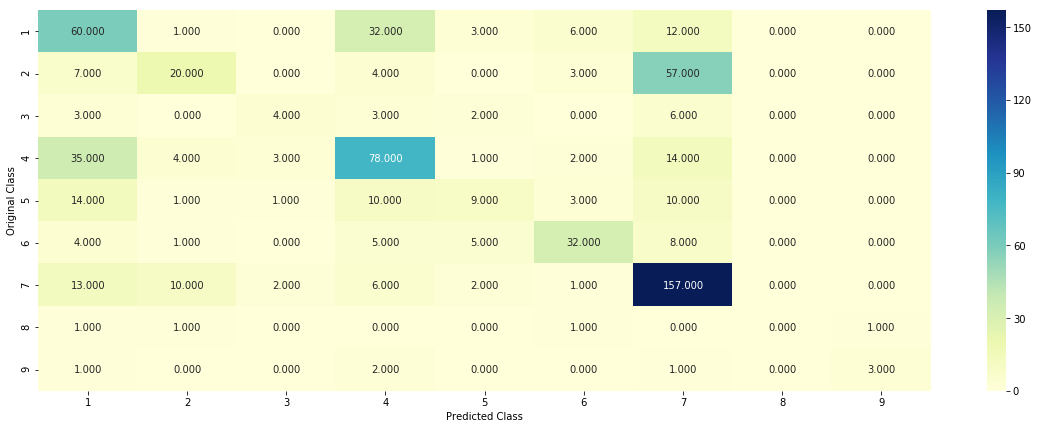

-------------------- Precision matrix (Columm Sum=1) --------------------


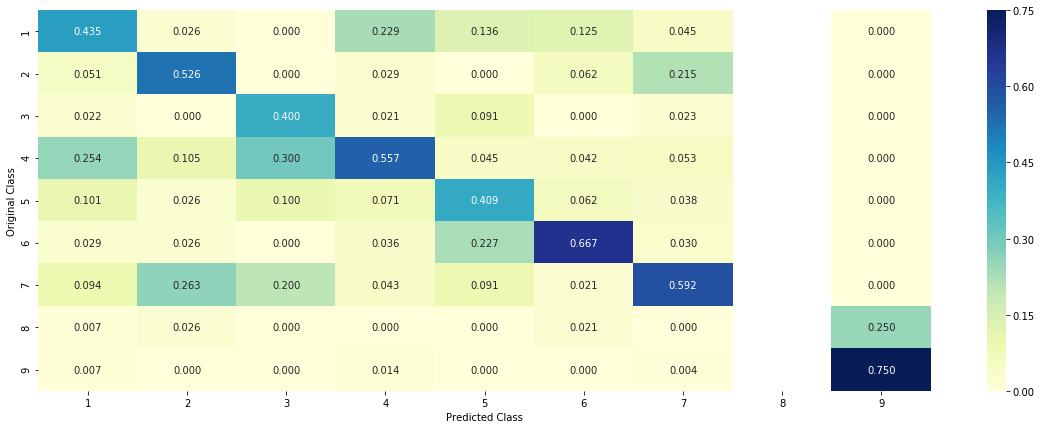

-------------------- Recall matrix (Row sum=1) --------------------


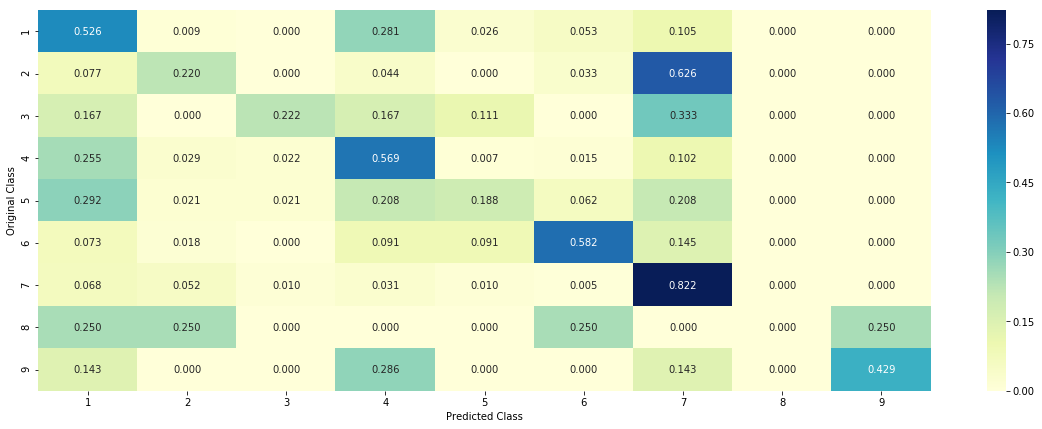

In [80]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('svc', sig_clf1), ('knn', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_df, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(train_df)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(cv_df)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(test_df)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=vclf.predict(test_df))

In [81]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(tfidf_sent_vectors, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

train_df = np.nan_to_num(train_df)
cv_df = np.nan_to_num(cv_df)
test_df = np.nan_to_num(test_df)

Log loss (train) on the VotingClassifier : 1.831774528799645
Log loss (CV) on the VotingClassifier : 1.8302599805352167
Log loss (test) on the VotingClassifier : 1.8305971961766965
Number of missclassified point : 0.7127819548872181
-------------------- Confusion matrix --------------------


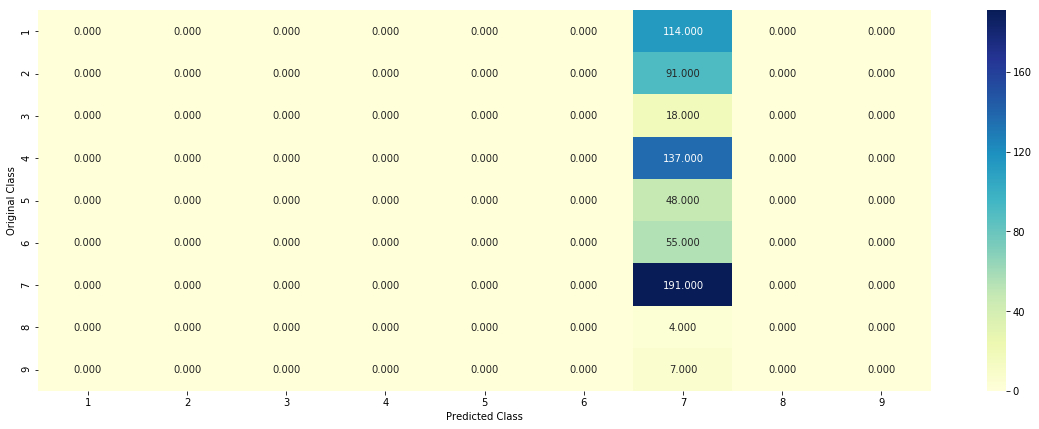

-------------------- Precision matrix (Columm Sum=1) --------------------


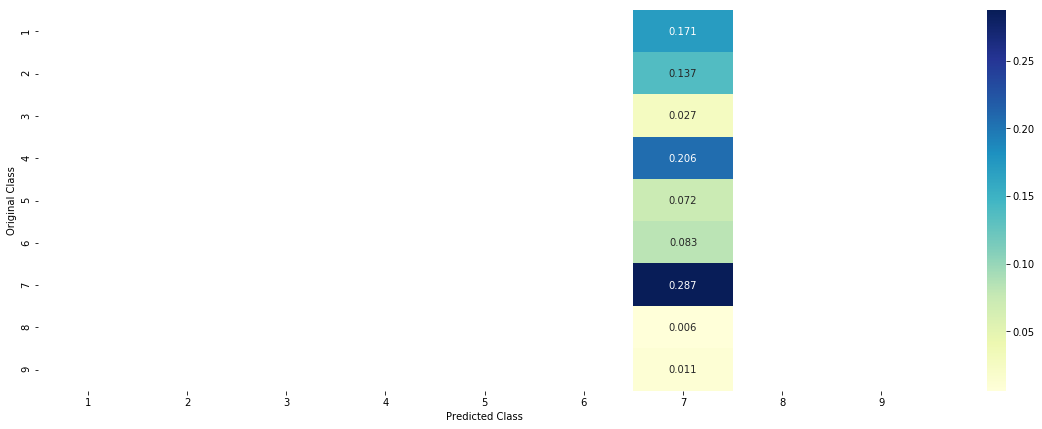

-------------------- Recall matrix (Row sum=1) --------------------


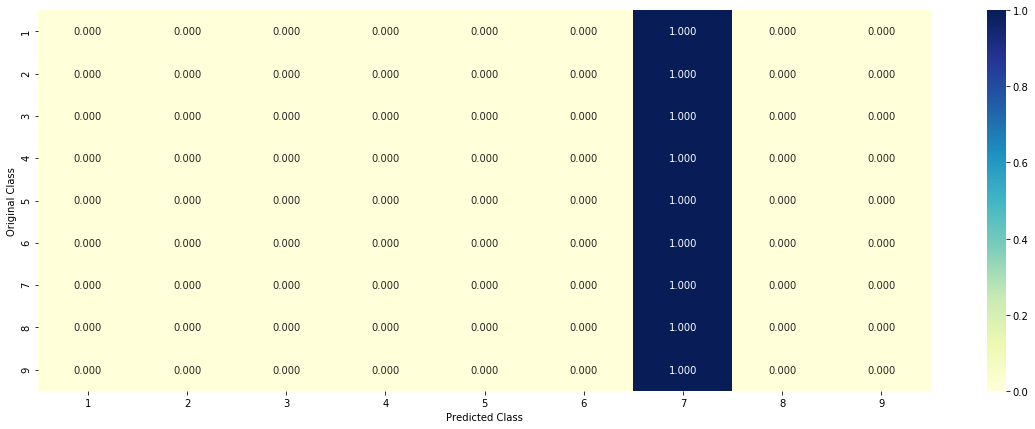

In [82]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('svc', sig_clf1), ('knn', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_df, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(train_df)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(cv_df)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(test_df)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(y_test=y_test, predict_y=vclf.predict(test_df))

# 8. Tabular Result

**8.1 Word2VEC**

In [1]:
import pandas as pd
dataframe = pd.DataFrame(
{
    "Maching Learning Model": ['Decision Trees','K' 'Nearest Neighbours','Logistic Regression [class balancing]','Logistic Regression [without class balancing]', 'Support Vector Classification', 'Support Vector Machines', 'Random Forest', 'Stacking [LR,SVC,NB] with K-NN', 'Stacking [Linear, K-NN, LR] with RF', 'Stacking [K-NN, SVC] with RF', 'Maximum Voting Classifier'],
    "Train (%)": [0.90,1.02,1.28,1.30,1.09,1.31,0.64,0.43,0.43,0.45,0.99],
    "CV (%)": [1.39,1.23,1.31,1.29,1.27,1.38,1.08,8.56,1.20,1.05,1.17],
    "Test (%)": [1.41,1.29,1.34,1.30,1.19,1.37,1.21,8.04,1.14,1.08,1.26],
    "Misclassification (%)": [43.04,42.85,48.68,45.11,46.05,0.5,37.59,38.34,41.50,37.74,45.41],
}

)
dataframe

,Maching Learning Model,Train (%),CV (%),Test (%),Misclassification (%)
0,Decision Trees,0.90,1.39,1.41,43.04
1,KNearest Neighbours,1.02,1.23,1.29,42.85
2,Logistic Regression [class balancing],1.28,1.31,1.34,48.68
3,Logistic Regression [without class balancing],1.30,1.29,1.30,45.11
4,Support Vector Classification,1.09,1.27,1.19,46.05
5,Support Vector Machines,1.31,1.38,1.37,0.50
6,Random Forest,0.64,1.08,1.21,37.59
7,"Stacking [LR,SVC,NB] with K-NN",0.43,8.56,8.04,38.34
8,"Stacking [Linear, K-NN, LR] with RF",0.43,1.20,1.14,41.50
9,"Stacking [K-NN, SVC] with RF",0.45,1.05,1.08,37.74


**8.2 TF-IDF**

In [2]:
import pandas as pd
dataframe = pd.DataFrame(
{
    "Maching Learning Model": ['Decision Trees','K' 'Nearest Neighbours','Logistic Regression [class balancing]','Logistic Regression [without class balancing]', 'Support Vector Classification', 'Support Vector Machines', 'Random Forest', 'Stacking [LR,SVC,NB] with K-NN', 'Stacking [Linear, K-NN, LR] with RF', 'Stacking [K-NN, SVC] with RF', 'Maximum Voting Classifier'],
    "Train (%)": [1.83,1.83,1.83,1.83,1.83,1.83,1.83,8.67,1.83,1.83,1.83],
    "CV (%)": [1.83,1.83,1.83,1.83,1.83,1.83,1.83,8.66,1.83,1.83,1.83],
    "Test (%)": [1.83,1.83,1.83,1.83,1.83,1.83,1.83,8.69,1.83,1.83,1.83],
    "Misclassification (%)": [71.24,71.24,71.24,71.24,71.24,71.24,71.24,86.31,71.27,71.27,71.27],
}

)
dataframe

,Maching Learning Model,Train (%),CV (%),Test (%),Misclassification (%)
0,Decision Trees,1.83,1.83,1.83,71.24
1,KNearest Neighbours,1.83,1.83,1.83,71.24
2,Logistic Regression [class balancing],1.83,1.83,1.83,71.24
3,Logistic Regression [without class balancing],1.83,1.83,1.83,71.24
4,Support Vector Classification,1.83,1.83,1.83,71.24
5,Support Vector Machines,1.83,1.83,1.83,71.24
6,Random Forest,1.83,1.83,1.83,71.24
7,"Stacking [LR,SVC,NB] with K-NN",8.67,8.66,8.69,86.31
8,"Stacking [Linear, K-NN, LR] with RF",1.83,1.83,1.83,71.27
9,"Stacking [K-NN, SVC] with RF",1.83,1.83,1.83,71.27
